<a href="https://colab.research.google.com/github/Jflorez05/Especializacion-Analitica/blob/main/Taller%202%20Parte%20A%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


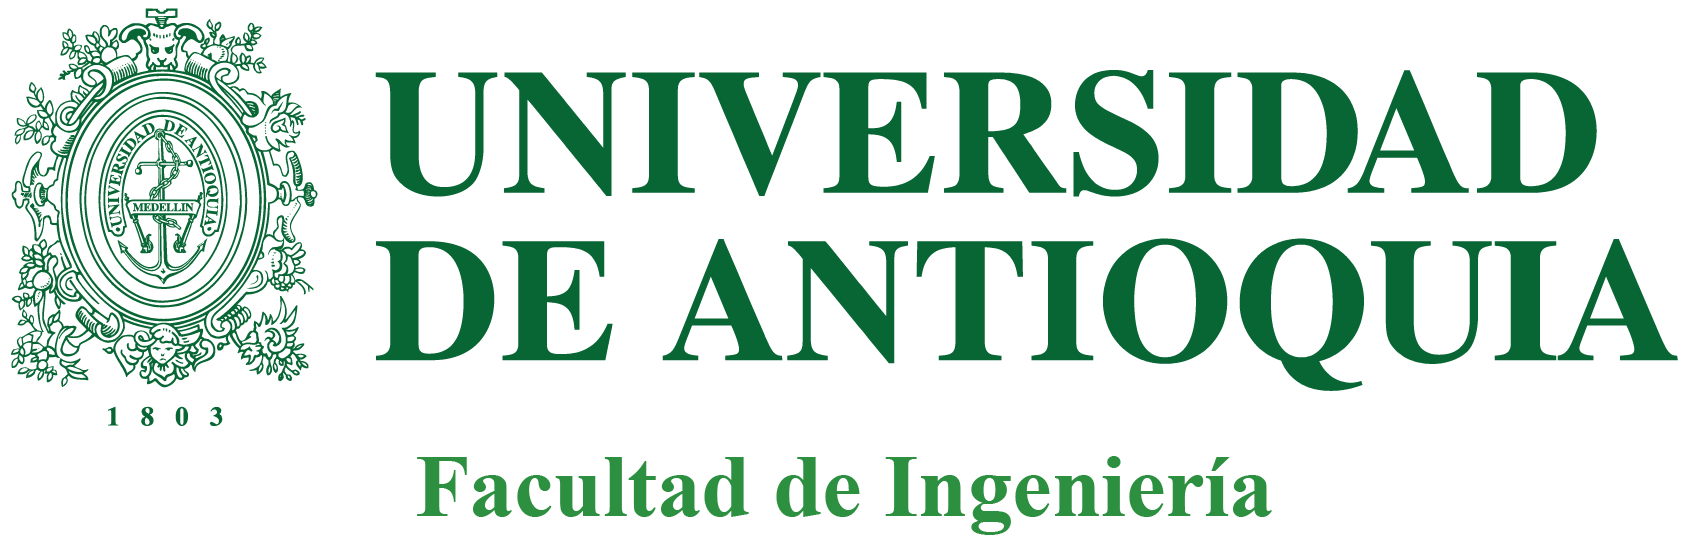
---
- **Asignatura:** Deep Learning
- **Profesor:** Hernán Felipe García Arias
- **Especialización en Analítica y Ciencia de Datos**
- **UdeA**
- **2024-2**

---

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

replicating local resources


In [ ]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

setting tensorflow version in colab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.17.0'

### Recurrent Neural Networks

Thanks to J.D.A.L and R.R.P for their notebooks

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [ ]:
%matplotlib inline

Recurrent Neural Networks (RNN) are a family of neural networks designed to process sequential data. This type of networks are specially suitable for problems where every sample is a sequence of objects (values) with statistical dependence among them.

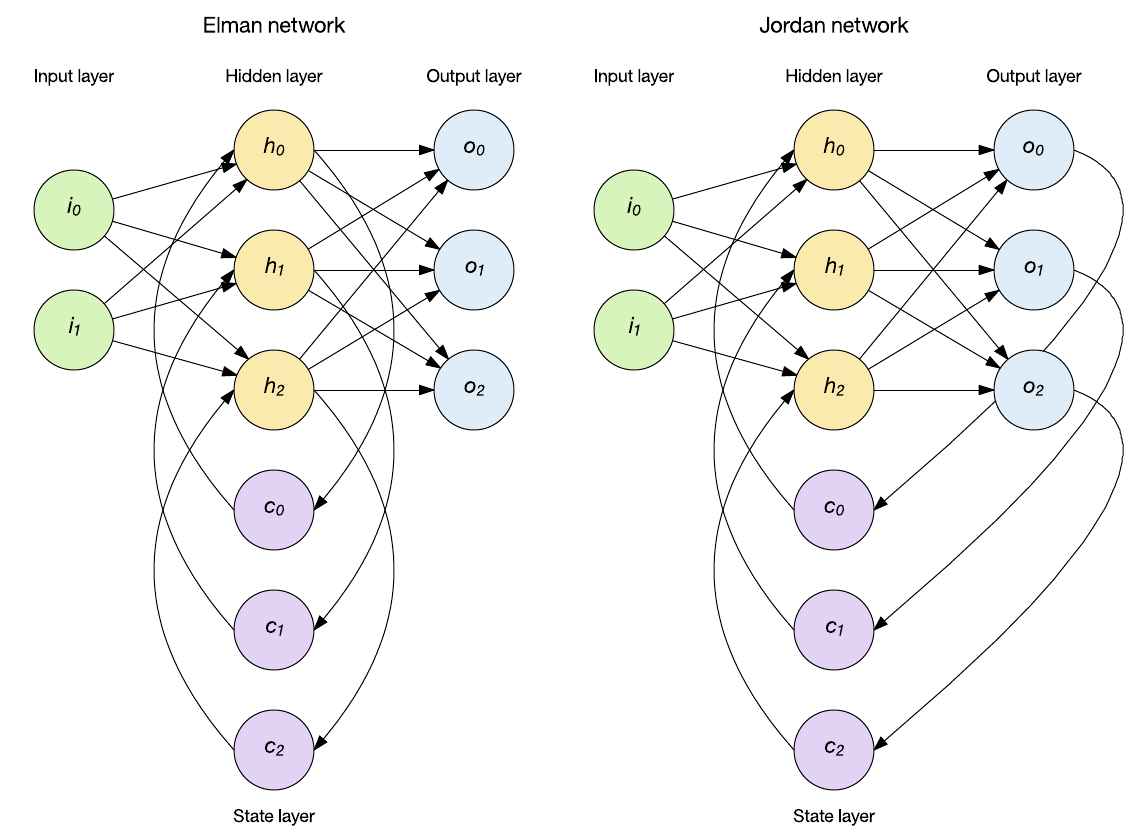

In [ ]:
from IPython.display import Image
Image(filename='local/imgs/RNN2.png', width=1200)

Elman networks and Jordan networks are both types of recurrent neural networks (RNNs) designed for processing sequential data, but they have different architectures and ways of connecting their neurons. Here's a breakdown of their primary differences:

**Architecture:**
- Elman Network: Also known as Simple Recurrent Network (SRN), it includes a context layer which stores the previous hidden layer output. This context layer is fed back into the hidden layer along with the current input. Essentially, the hidden layer’s output is copied into the context layer, which is then used as part of the input to the hidden layer in the next time step.
- Jordan Network: In this network, the output layer's previous values are fed back into the hidden layer. This feedback from the output layer to the hidden layer enables the network to use its own predictions to influence the model, which can be particularly useful in generating or continuing sequences.

**Feedback Connections:**

- Elman Network: Feedback occurs from the hidden layer to itself, indirectly through a context layer that stores the previous state of the hidden layer.
- Jordan Network: Feedback occurs from the output layer back to the hidden layer, allowing the network's previous outputs to inform its current state.

**Usage:**

- Elman Network: It is often used for tasks where the context of the input is important within a relatively short horizon, such as part-of-speech tagging or other tasks where the immediate past is most relevant.
- Jordan Network: It tends to be useful in tasks where the continuation of a sequence is important, such as in music generation or language modeling, where the most recent output influences the next output.

**Memory:**

- Elman Network: Generally considered to have short-term memory, suitable for scenarios where the context does not need to be maintained over long sequences.
- Jordan Network: Also typically has short-term memory but uses its output as a form of longer-term influence, which might be slightly more biased towards recent outputs.

**Training Complexity:**

- Both networks are susceptible to the typical training challenges of RNNs, like vanishing and exploding gradients, but their different feedback mechanisms can influence the difficulty and effectiveness of training in different scenarios.

In essence, the choice between an Elman and a Jordan network often depends on the specific requirements of the task, particularly how the information (context or outputs) needs to be fed back into the network to best model the sequence dynamics.**

RNNs can be designed to solve different learning paradigms, in other words, they are able to adapt to different data configurations.

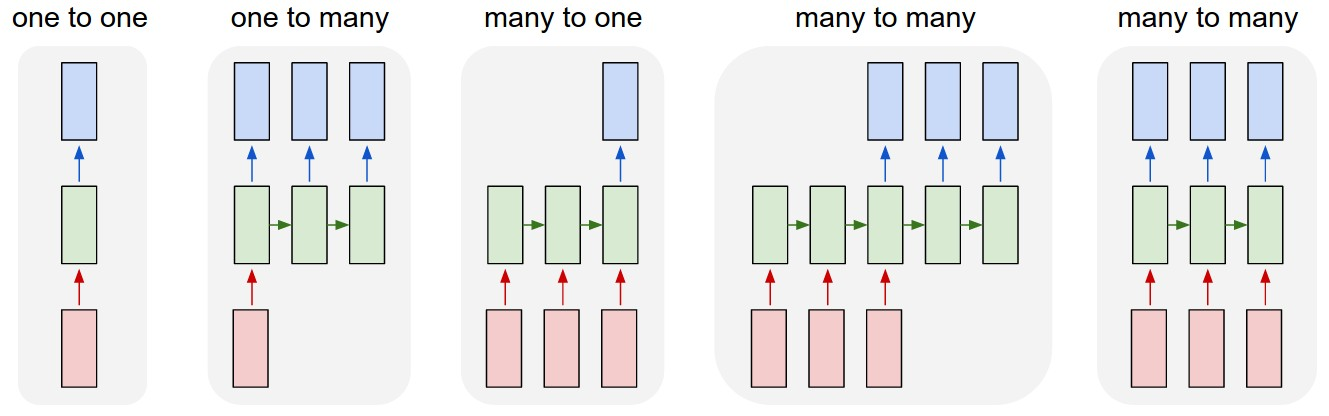

In [ ]:
Image(filename='local/imgs/RNN-Topol.jpeg', width=1200)

Image taken from <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">Andrej Karpathy</a>

Examples:

- 1. Conventional MLP
- 2. Caption generation
- 3. Sentiment analysis
- 4. Language translation
- 5. Named Entity Recognition or Part Of Speech Tagging


### Lets do some examples using conventional MLPs

First we need some data:

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, RepeatVector, TimeDistributed, LSTM
from tensorflow import keras
from local.lib import DataPreparationRNN

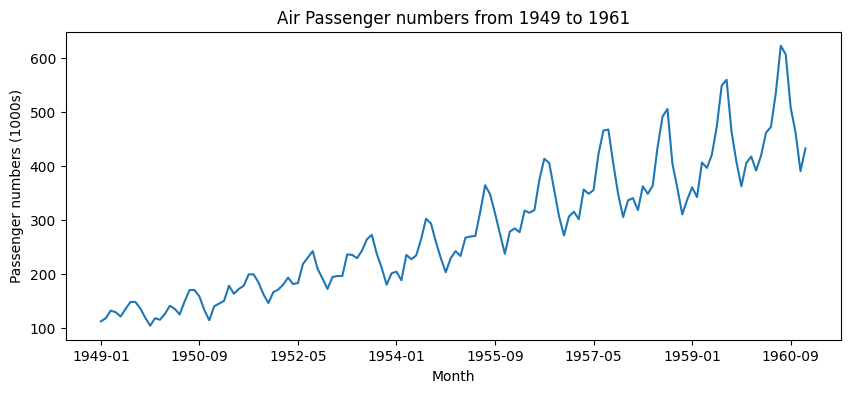

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datasetO = pd.read_csv('local/data/international-airline-passengers.csv', usecols=[0,1], engine='python', skipfooter=3)
datasetO.plot(0,1,figsize=(10,4))
plt.ylabel('Passenger numbers (1000s)')
plt.title('Air Passenger numbers from 1949 to 1961')
plt.legend().remove()
plt.show()

In [ ]:
datasetO

Month  \
0    1949-01   
1    1949-02   
2    1949-03   
3    1949-04   
4    1949-05   
..       ...   
139  1960-08   
140  1960-09   
141  1960-10   
142  1960-11   
143  1960-12   

     International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  
0                                                  112                               
1                                                  118                               
2                                                  132                               
3                                                  129                               
4                                                  121                               
..                                                 ...                               
139                                                606                               
140                                                508                               
141                                                461                               
142                                                390                               
143                                                432                               

[144 rows x 2 columns]

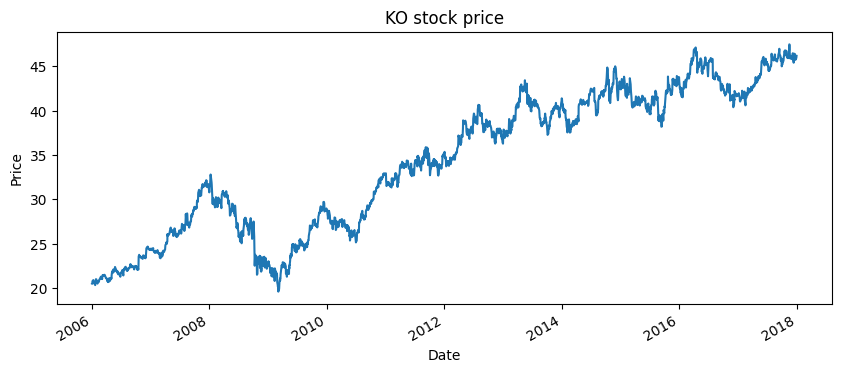

In [ ]:
dataset1 = pd.read_csv('local/data/KO_2006-01-01_to_2018-01-01.csv', usecols=['Date','High'], parse_dates=['Date'])
dataset1.plot('Date','High',figsize=(10,4))
plt.ylabel('Price')
plt.title('KO stock price')
plt.legend().remove()
plt.show()

### How to split data for validation purposes?

Traditional approach:

In [ ]:
datasetO

Month  \
0    1949-01   
1    1949-02   
2    1949-03   
3    1949-04   
4    1949-05   
..       ...   
139  1960-08   
140  1960-09   
141  1960-10   
142  1960-11   
143  1960-12   

     International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  
0                                                  112                               
1                                                  118                               
2                                                  132                               
3                                                  129                               
4                                                  121                               
..                                                 ...                               
139                                                606                               
140                                                508                               
141                                                461                               
142                                                390                               
143                                                432                               

[144 rows x 2 columns]

In [ ]:
datasetO

Month  \
0    1949-01   
1    1949-02   
2    1949-03   
3    1949-04   
4    1949-05   
..       ...   
139  1960-08   
140  1960-09   
141  1960-10   
142  1960-11   
143  1960-12   

     International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  
0                                                  112                               
1                                                  118                               
2                                                  132                               
3                                                  129                               
4                                                  121                               
..                                                 ...                               
139                                                606                               
140                                                508                               
141                                                461                               
142                                                390                               
143                                                432                               

[144 rows x 2 columns]

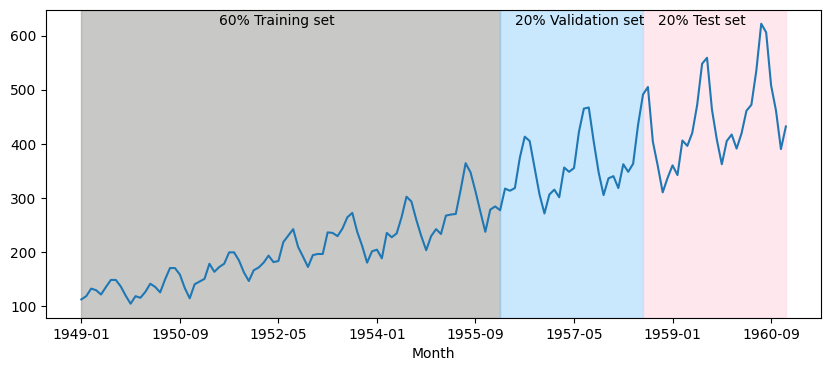

In [ ]:
from local.lib import DataPreparationRNN
datasetO = pd.read_csv('local/data/international-airline-passengers.csv', usecols=[0,1], engine='python', skipfooter=3)
DataPreparationRNN.PlotValidationTimeSeries(datasetO)

Crossvalidation in timeseries:

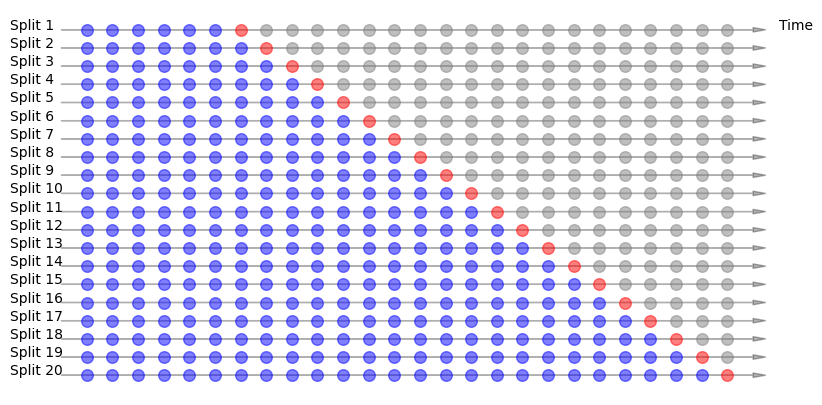

In [ ]:
DataPreparationRNN.PlotCrossvalidationTS()

Including a gap between training and validation sets:

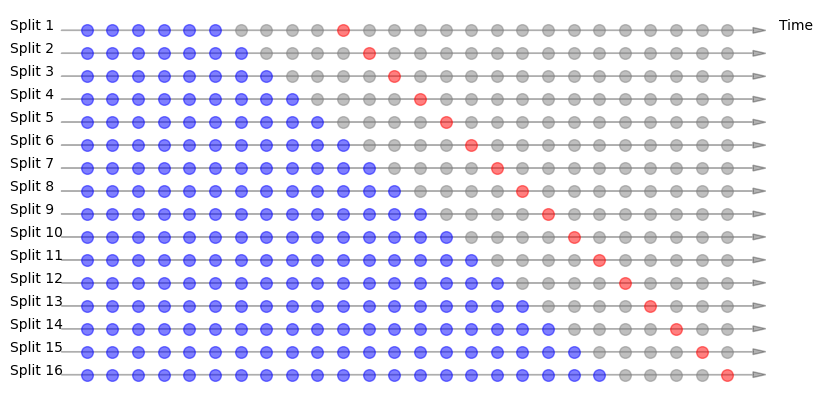

In [ ]:
DataPreparationRNN.PlotCrossvalidationTS_Gap()

This can be done using the class TimeSeriesSplit:

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
X = np.arange(20)
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 1 2 3 4] TEST: [5 6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [ 8  9 10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] TEST: [11 12 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17 18 19]


Limiting the number of lacks

In [ ]:
X = np.arange(20)
tscv = TimeSeriesSplit(max_train_size=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 1 2 3 4] TEST: [5 6 7]
TRAIN: [3 4 5 6 7] TEST: [ 8  9 10]
TRAIN: [ 6  7  8  9 10] TEST: [11 12 13]
TRAIN: [ 9 10 11 12 13] TEST: [14 15 16]
TRAIN: [12 13 14 15 16] TEST: [17 18 19]


For simplicity we are goin to split the data manualy into training and validation sets using the classical approach

In [ ]:
from local.lib.DataPreparationRNN import split_sequence
from sklearn.preprocessing import MinMaxScaler
look_back=1
datasetO = pd.read_csv('local/data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)
print('Train',X_train[:10])
print('Test',y_train[:10])

Train [[[0.02588999]]

 [[0.04530746]]

 [[0.09061491]]

 [[0.08090615]]

 [[0.05501619]]

 [[0.10032365]]

 [[0.14239484]]

 [[0.14239484]]

 [[0.10355988]]

 [[0.04854369]]]
Test [[0.04530746]
 [0.09061491]
 [0.08090615]
 [0.05501619]
 [0.10032365]
 [0.14239484]
 [0.14239484]
 [0.10355988]
 [0.04854369]
 [0.        ]]


Let's create the MLP.

In [ ]:
#keras.backend.clear_session()
model1 = Sequential()
model1.add(Dense(5,activation = 'relu',input_dim=look_back))
model1.add(Dense(1))
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Train Score: 67.96 RMSE
Test Score: 208.95 RMSE
Train Score: 27.70 MAPE
Test Score: 45.55 MAPE
1


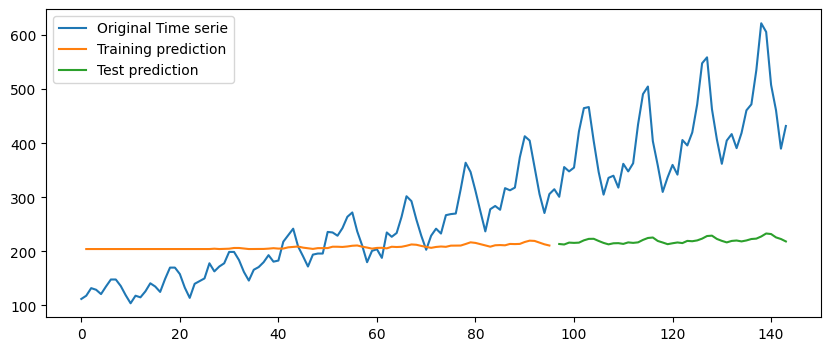

In [ ]:
model1.compile(optimizer='adam',loss='mse')
model1.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=200, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE(model1,X_train,X_test,y_train,y_test,scaler,look_back)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

### Using three steps backward to predict one step ahead:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 22.35 RMSE
Test Score: 46.23 RMSE
Train Score: 8.59 MAPE
Test Score: 8.79 MAPE
1


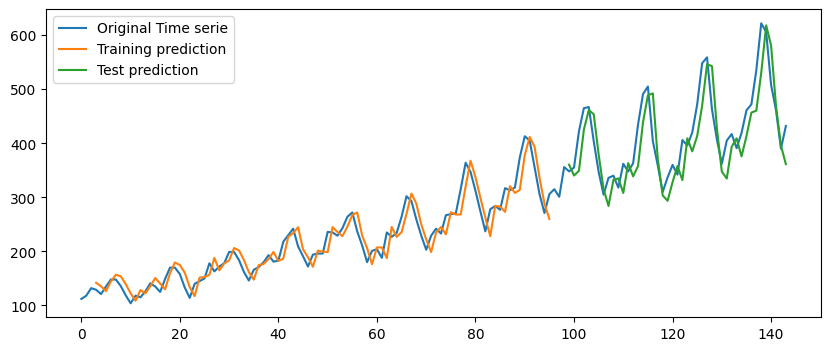

In [ ]:
look_back = 3;
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)
model3 = Sequential()
model3.add(Dense(5,activation = 'relu',input_dim=look_back))
model3.add(Dense(1))
model3.compile(optimizer='adam',loss='mse')
model3.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=200, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE(model3,X_train,X_test,y_train,y_test,scaler,look_back)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

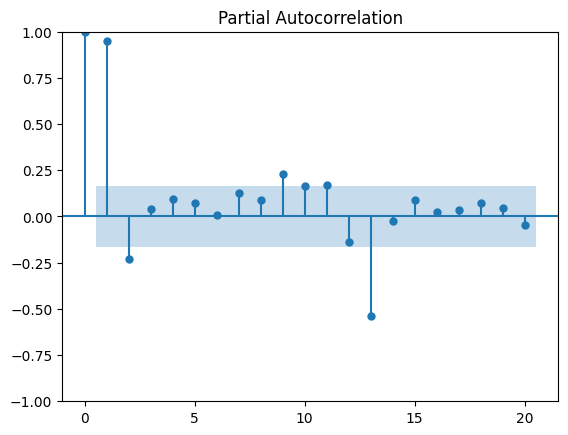

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(datasetO, lags=20)
plt.show()

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train Score: 0.35 RMSE
Test Score: 0.44 RMSE
Train Score: 0.81 MAPE
Test Score: 0.84 MAPE
1


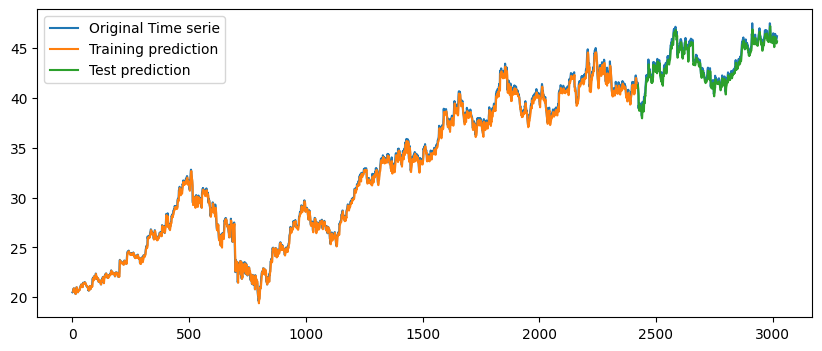

In [ ]:
look_back=3
dataset1 = pd.read_csv('local/data/KO_2006-01-01_to_2018-01-01.csv', usecols=['High'])
dataset1[np.isnan(dataset1)] = dataset1['High'].max()
dataset = dataset1.values
dataset = dataset.astype('float32')
# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)
#------------------------------------------------------------------
keras.backend.clear_session()
model3b = Sequential()
model3b.add(Dense(30,activation = 'relu',input_dim=look_back))
model3b.add(Dense(1))
model3b.compile(optimizer='adam',loss='mse')
model3b.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=50, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE(model3b,X_train,X_test,y_train,y_test,scaler,look_back)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

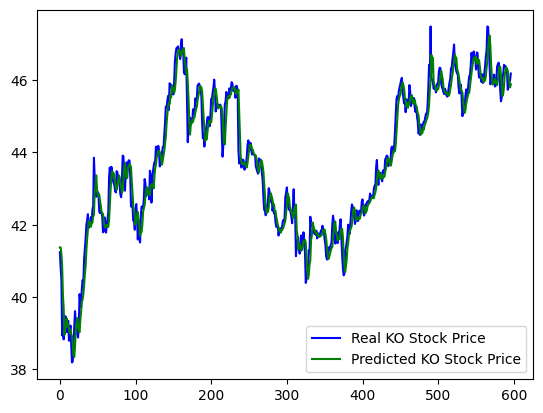

In [ ]:
plt.plot(scaler.inverse_transform(y_test),'b',label='Real KO Stock Price')
plt.plot(testPredict,'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

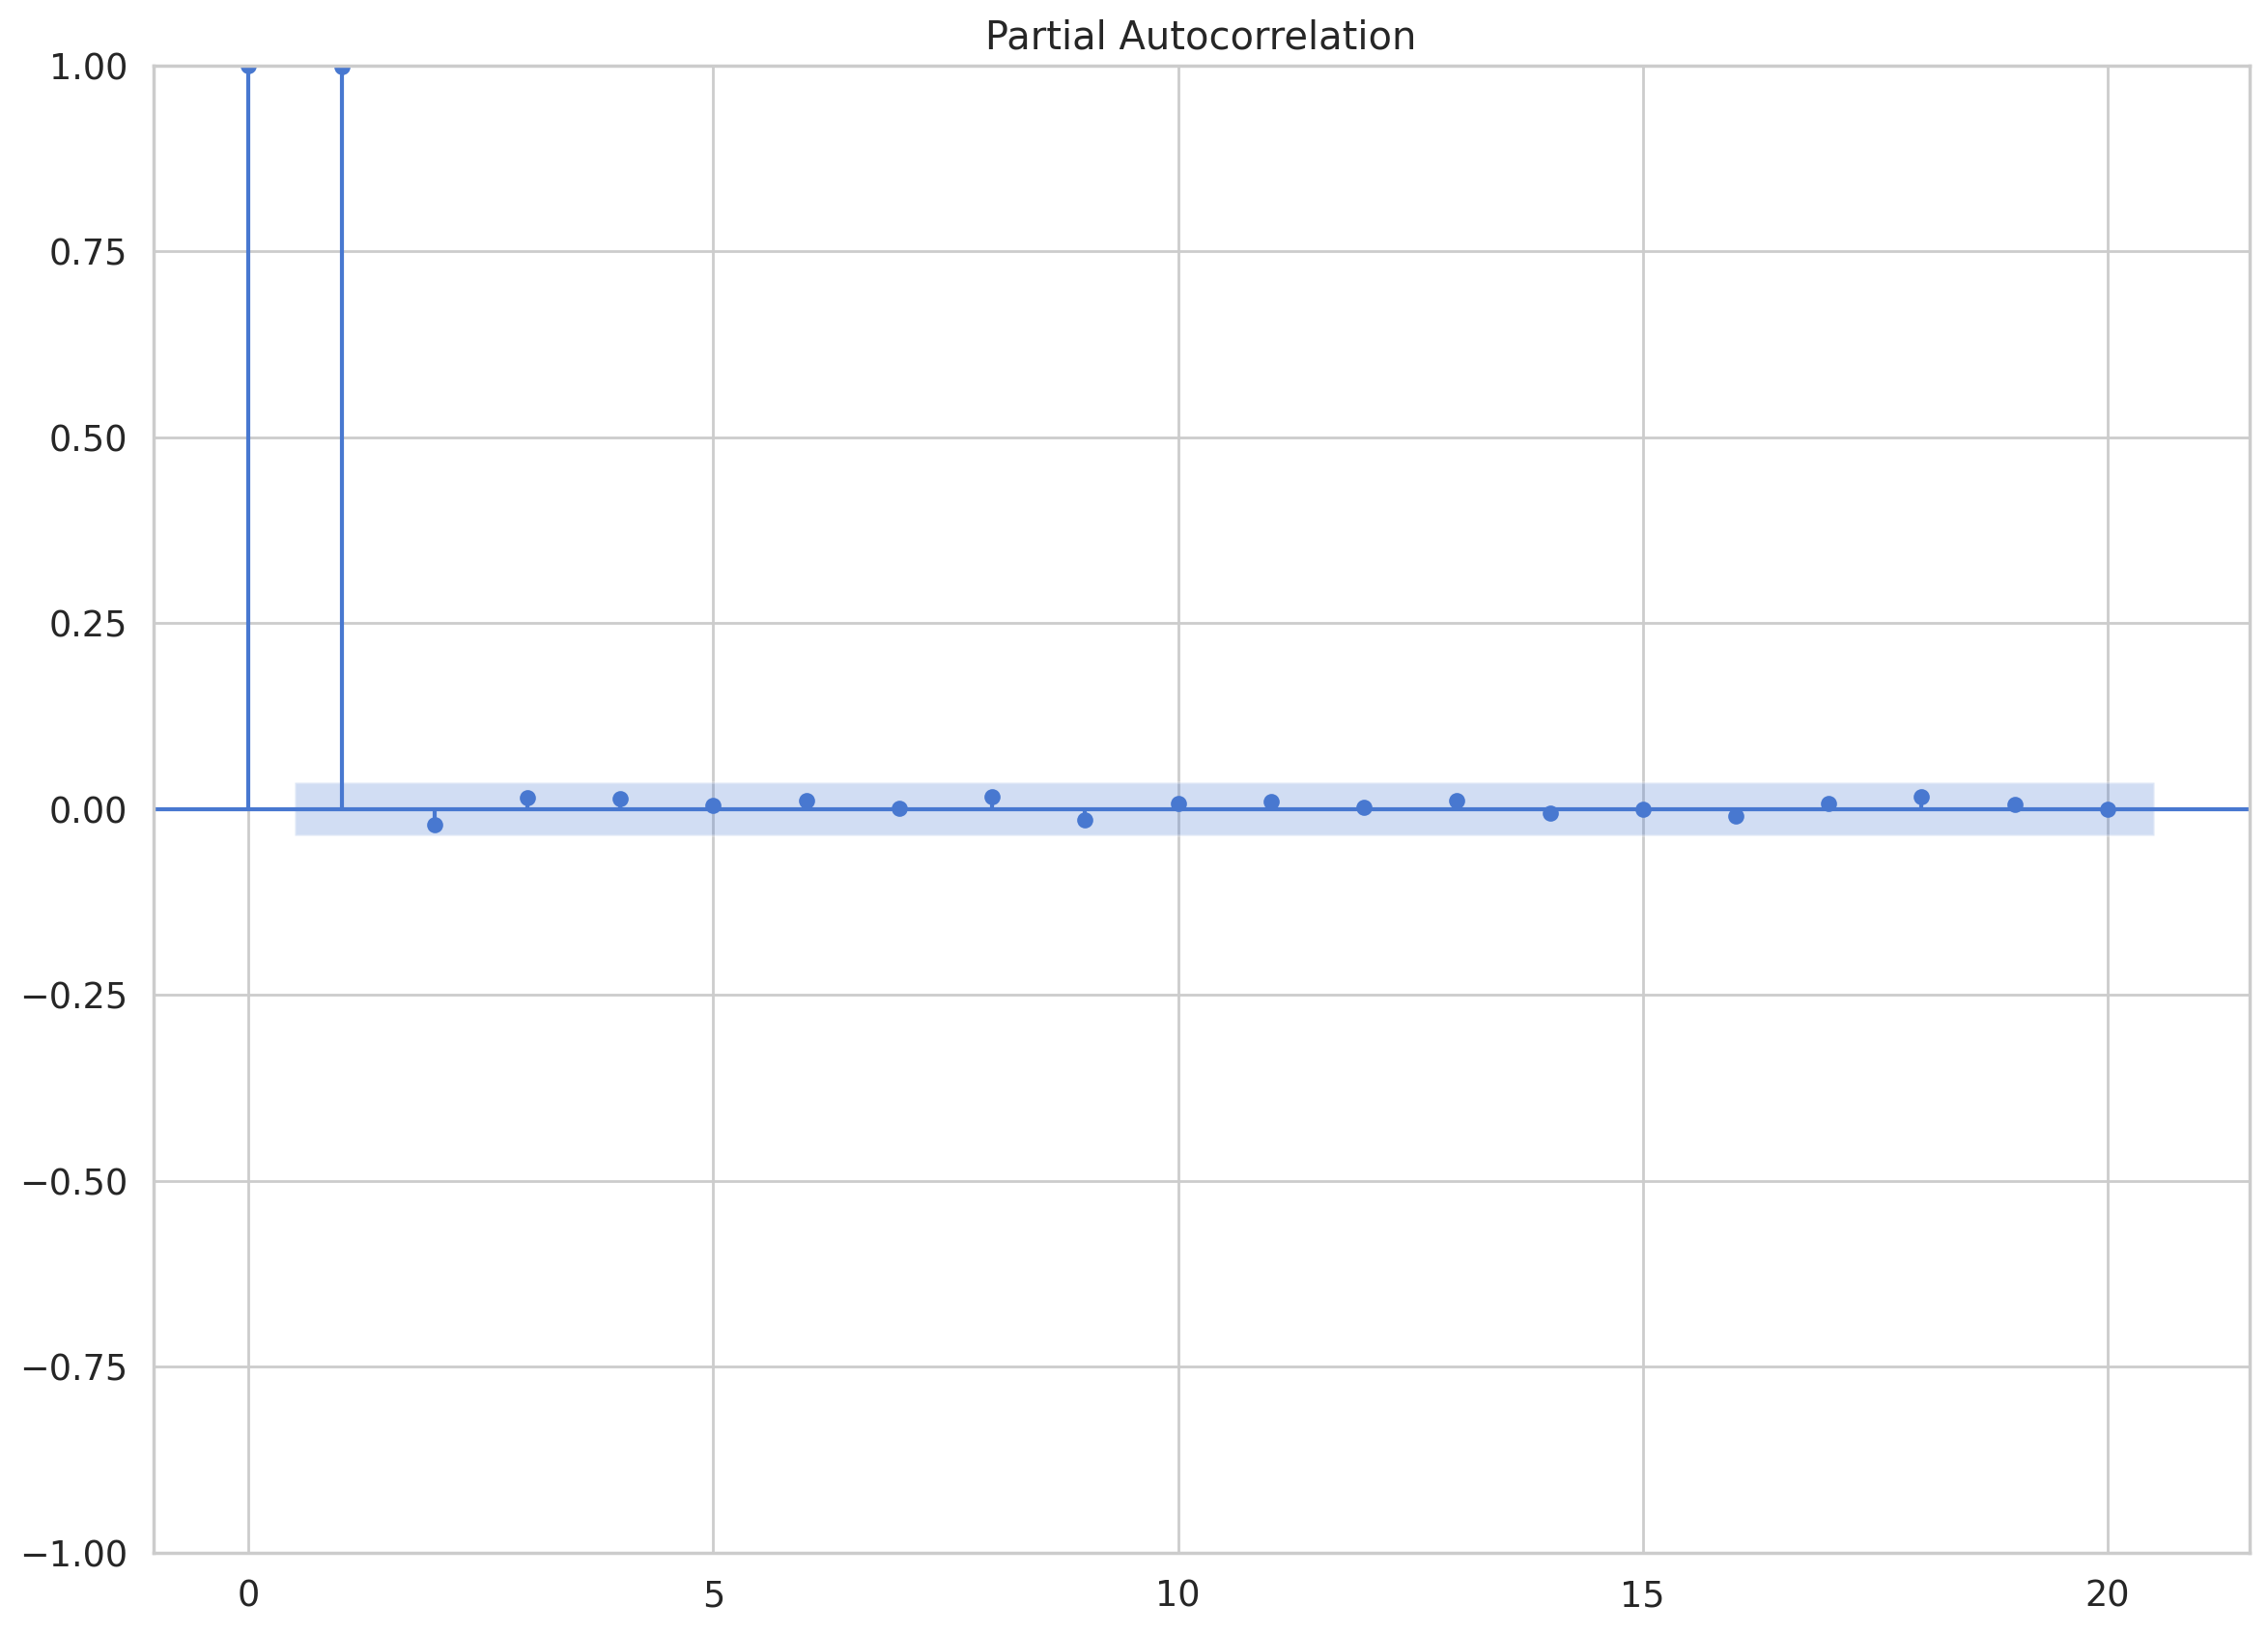

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dataset1, lags=20)
plt.show()

There are also problems with basic MLP when we have multiple time series to forecast one of them (**Multiple Input series**), or multiple time series to predict  all of them (**Multiple parallel series**)

### Let's define formaly the Recurrent Neural Networks

An alternative view of the network

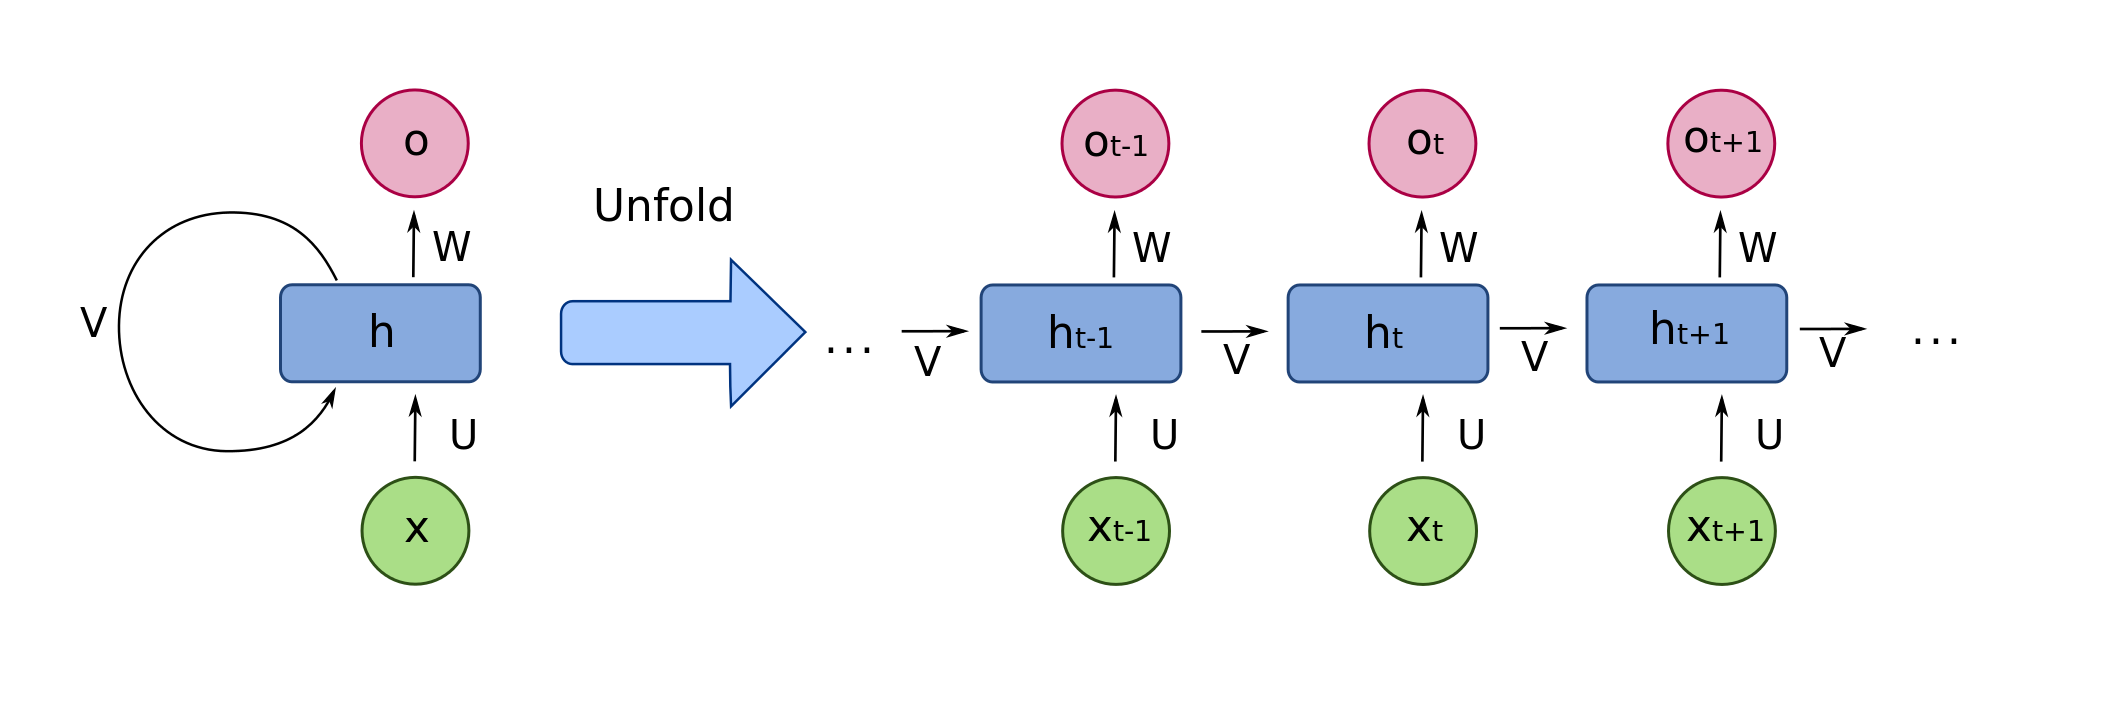

In [ ]:
from IPython.display import Image
Image(filename='local/imgs/RNN3.png', width=1200)

According to the notation in the in the former Figure, the mathematical formulation of an Elman RNN with one hidden layer and one output layer is given by:

$${\bf{a}}^{(t)} = {\bf{b}} + {\bf{V}}{\bf{h}}^{(t-1)} + {\bf{U}}{\bf{x}}^{(t)},\\ {\bf{h}}^{(t)} = \tanh({\bf{a}}^{(t)}), \\ {\bf{o}}^{(t)} = {\bf{c}} + {\bf{W}}{\bf{h}}^{(t)}$$

where $\bf{V}$ is the weights matrix of the feedback loop. $\bf{U}$ is the  weights matrix of the inputs and $\bf{W}$ is the weights matrix that contects the **state** of the network with the output layer. $\bf{b}$ and $\bf{c}$ are the bias vectors for the hidden and output layers respectively. The ouput of the network ${\bf{y}}^{(t)}$ corresponds to the application of the activation function to the values ${\bf{o}}^{(t)}$.

### Backpropagation through time (BPTT)

The first step for training a RNN is to define the loss function. Let's consider a sequence of length $\tau$, the loss for that single sequence can be expressed as:

$$L(\{ {\bf{y}}^{(1)},{\bf{y}}^{(2)},\cdots,{\bf{y}}^{(\tau)} \}, \{ {\bf{\hat{y}}}^{(1)},{\bf{\hat{y}}}^{(2)},\cdots,{\bf{\hat{y}}}^{(\tau)} \}) \\
L = \sum_t L^{(t)}$$

If for instance the loss function for output $i$ is $L^{(t)} = -\log \hat{y}_i^{(t)}$, then

$$(\nabla_{{\bf{o}}^{(t)}}L)_i = \frac{\partial L}{\partial o_i^{(t)}} = \frac{\partial L}{\partial L^{(t)}} \frac{\partial L^{(t)}}{\partial \hat{y}_i^{(t)}} \frac{\partial \hat{y}_i^{(t)}}{\partial o_i^{(t)}} = \hat{y}_i^{(t)} - 1 \\ \nabla_{{\bf{o}}^{(t)}}L = {\bf{y}}^{(t)} \odot ({\bf{\hat{y}}}^{(t)} - {\bf{1}} )$$

where $\odot$ is the Hadamard product. When $t=\tau$, ${\bf{h}}^{(\tau)}$ only has ${\bf{o}}^{(\tau)}$ as descendent, so its gradient is simple:

$$ \nabla_{{\bf{h}}^{(\tau)}} L = {\bf{W}}^T\nabla_{{\bf{o}}^{(\tau)}}L$$

From this two results we can iterate backward in time to back-propagate gradients through time. From $t=\tau-1$ down to $\tau = 1$, ${\bf{h}}^{(t)}$ has two descendents: ${\bf{h}}^{(t+1)}$ and ${\bf{o}}^{(t)}$, therefore its gradient is given by:   

$$ \nabla_{{\bf{h}}^{(t)}}L = \left( \frac{\partial {\bf{h}}^{(t+1)}}{\partial {\bf{h}}^{(t)}}\right)^T(\nabla_{{\bf{h}}^{(t+1)}} L) + \left(\frac{\partial {\bf{o}}^{(t)}}{\partial {\bf{h}}^{(t)}}\right)^T(\nabla_{{\bf{o}}^{(t)}}L) \\
\nabla_{{\bf{h}}^{(t)}}L = {\bf{V}}^T\text{diag} \left( 1 - \left( {\bf{h}}^{(t+1)} \right)^2\right)(\nabla_{{\bf{h}}^{(t+1)}} L) + {\bf{W}}^T(\nabla_{{\bf{o}}^{(t)}}L)$$

Based on the former results, the rest of the gradients can be calculated as:

$$ \nabla_{\bf{c}} L = \sum_t \left(\frac{\partial {\bf{o}}^{(t)}}{\partial {\bf{c}}}\right)^T \nabla_{{\bf{o}}^{(t)}}L$$

$$ \nabla_{\bf{b}} L = \sum_t \left(\frac{\partial {\bf{h}}^{(t)}}{\partial {\bf{b}}}\right)^T \nabla_{{\bf{h}}^{(t)}}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)\nabla_{{\bf{h}}^{(t)}} L $$

$$\nabla_{{\bf W}}L = \sum_t \sum_i \left(  \frac{\partial L}{\partial o_i^{(t)}} \right)^T \nabla_{{\bf W}} o_i^{(t)} = \sum_t (\nabla_{{\bf{o}}^{(t)}}L){\bf{h}}^{(t)^T}$$

$$\nabla_{\bf V}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)(\nabla_{{\bf{h}}^{(t)}} L){\bf{h}}^{(t-1)^T}$$

$$ \nabla_{\bf U}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)(\nabla_{{\bf{h}}^{(t)}} L){\bf{x}}^{(t)^T} $$

## Now using a RNN layer instead of a Dense layer:

Input data must have the following structure: **[n_samples,n_times,n_features]**

Input: **[n_samples,1,1]**

In [ ]:
look_back = 1;
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0516
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0387 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0470 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0332 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0295 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0260 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 
Epoch 13/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 
Epoch 14/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 
Epoch 15/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 
Epoch 16/500
3/3 ━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 22.91 RMSE
Test Score: 48.55 RMSE
Train Score: 8.54 MAPE
Test Score: 9.77 MAPE
1


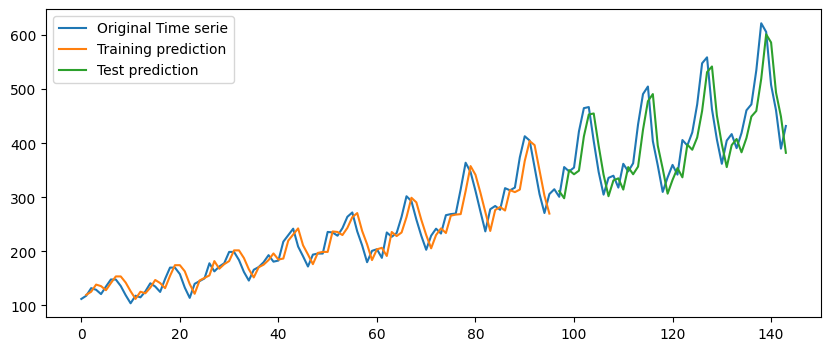

In [ ]:
model4 = Sequential()
model4.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model4.add(Dense(1))
model4.compile(optimizer='adam',loss='mse')
model4.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=1)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model4,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

In [ ]:
aux = model4.predict(X_test.reshape(X_test.shape[0],1,look_back))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


In [ ]:
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125 (504.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

### Using multiple times as features

Input: **[n_samples,1,2]**

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1543
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1586  
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1372 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1499  
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1407 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1351 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1345 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1262  
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1081 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1097 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1050 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0962 
Epoch 13/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1038 
Epoch 14/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0982 
Epoch 15/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0954 
Epoch 16/500
3/3

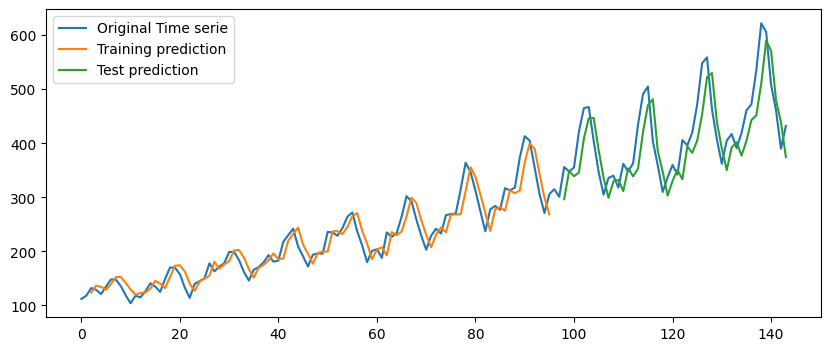

In [ ]:
look_back = 2;
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)
#-----------------------------------------------------------------
model4b = Sequential()
model4b.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model4b.add(Dense(1))
#-------------------------------------------------------------------

model4b.compile(optimizer='adam',loss='mse')
model4b.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=1)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model4b,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

In [ ]:
model4b.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140 (564.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 94 (380.00 B)

Using multiple times instead of multiple features:

### Using multiple times as multiple times!

Input: **[n_samples,2,1]**

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Train Score: 21.74 RMSE
Test Score: 52.13 RMSE
Train Score: 8.39 MAPE
Test Score: 9.72 MAPE
1


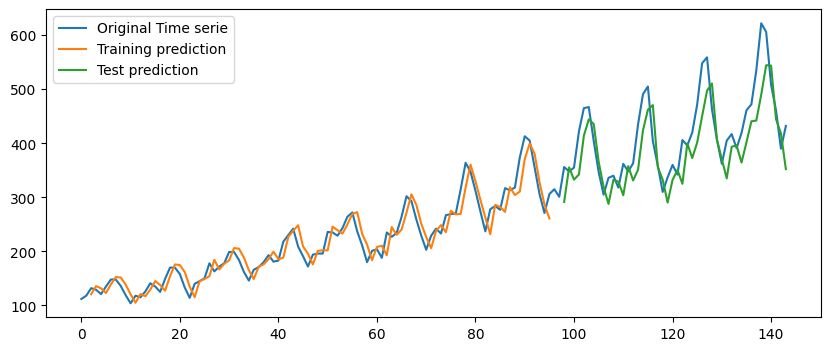

In [ ]:
n_steps = 2;
X_train, y_train = DataPreparationRNN.create_dataset(trainN, n_steps)
X_test, y_test = DataPreparationRNN.create_dataset(testN, n_steps)
#---------------------------------------------------------------------
model6 = Sequential()
model6.add(SimpleRNN(5,activation = 'relu',input_shape=(n_steps,1)))
model6.add(Dense(1))
#---------------------------------------------------------------------
model6.compile(optimizer='adam',loss='mse')
model6.fit(X_train.reshape(X_train.shape[0],n_steps,1),y_train.flatten(),epochs=500, verbose=0)
#-----------------------------------------------------------------------------------------------------
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model6,X_train,X_test,y_train,y_test,scaler,1,n_steps)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,n_steps)

In [ ]:
model6.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125 (504.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 0.30 RMSE
Test Score: 0.32 RMSE
Train Score: 0.69 MAPE
Test Score: 0.53 MAPE
1


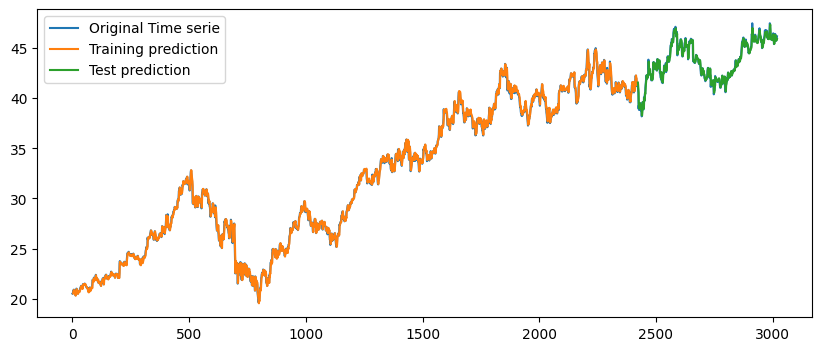

In [ ]:
n_steps = 3;
dataset = dataset1.values
dataset = dataset.astype('float32')
# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, n_steps)
X_test, y_test = DataPreparationRNN.create_dataset(testN, n_steps)
#---------------------------------------------------------------------
model6 = Sequential()
model6.add(SimpleRNN(30,activation = 'relu',input_shape=(n_steps,1)))
model6.add(Dense(1))
model6.compile(optimizer='adam',loss='mse')
#-----------------------------------------------------------------------
model6.fit(X_train.reshape(X_train.shape[0],n_steps,1),y_train.flatten(),verbose=0,epochs=50,batch_size=32)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model6,X_train,X_test,y_train,y_test,scaler,1,n_steps)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,n_steps)

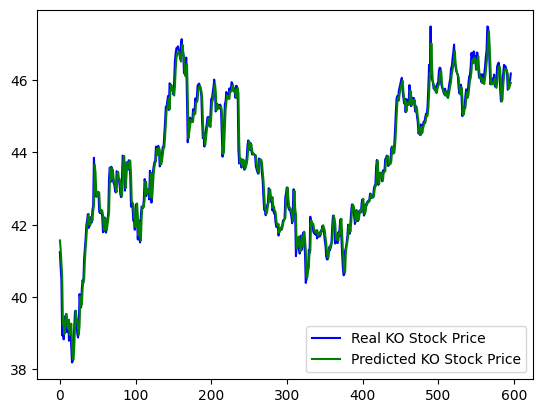

In [ ]:
plt.plot(scaler.inverse_transform(y_test[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

## Lets make more complex architectures
### Two recurrent layers:

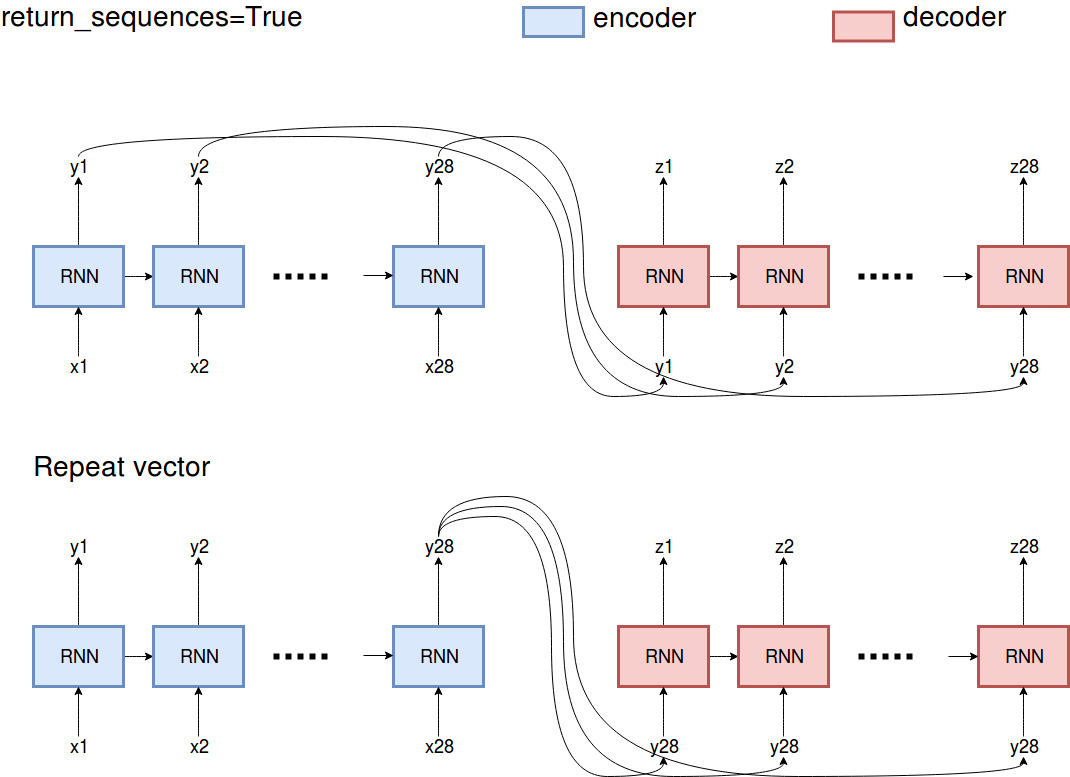

In [ ]:
Image(filename='local/imgs/ReturnSeq.jpg', width=800)

Input: **[n_samples,1,1]**

**Option1**: Propagate the first layer and provide only the output of the last time step to the following layer:

In [ ]:
look_back = 2;
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 20.92 RMSE
Test Score: 47.72 RMSE
Train Score: 7.84 MAPE
Test Score: 9.22 MAPE
1


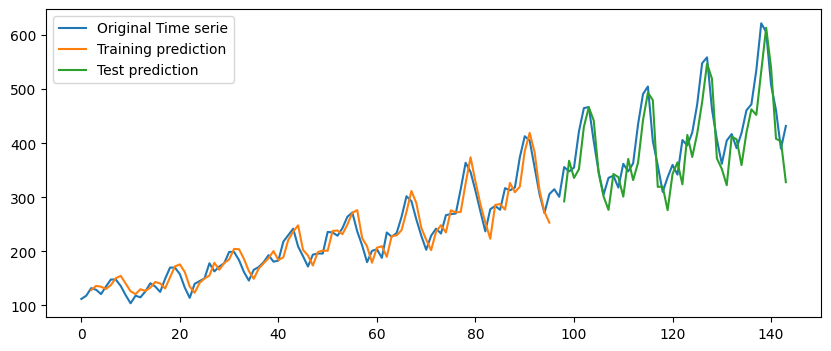

In [ ]:
model5 = Sequential()
model5.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model5.add(RepeatVector(look_back))
model5.add(SimpleRNN(5,activation = 'relu'))
model5.add(Dense(1))
#-------------------------------------------------------------------------
model5.compile(optimizer='adam',loss='mse')
model5.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model5,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

In [ ]:
model5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)             │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 2, 5)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305 (1.20 KB)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204 (820.00 B)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 0.45 RMSE
Test Score: 0.88 RMSE
Train Score: 1.11 MAPE
Test Score: 1.58 MAPE
1


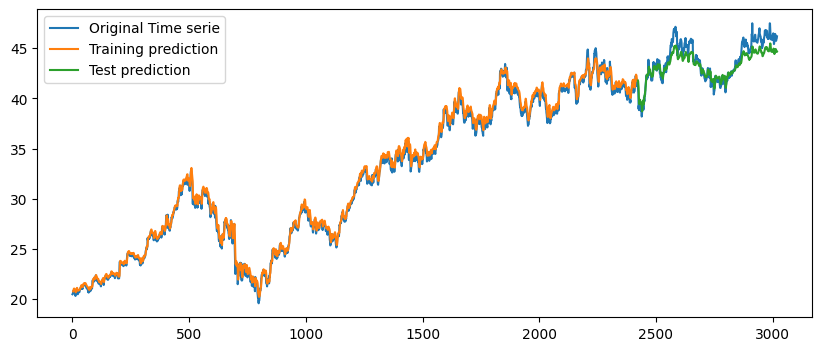

In [ ]:
look_back = 3;
dataset = dataset1.values
dataset = dataset.astype('float32')
# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)
#---------------------------------------------------------------------
model5 = Sequential()
model5.add(SimpleRNN(20,activation = 'relu',input_shape=(1,look_back)))
model5.add(RepeatVector(look_back))
model5.add(SimpleRNN(20,activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model5.add(Dense(1))
#----------------------------------------------------------------------
model5.compile(optimizer='adam',loss='mse')
model5.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=50, validation_split=0.10,verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model5,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

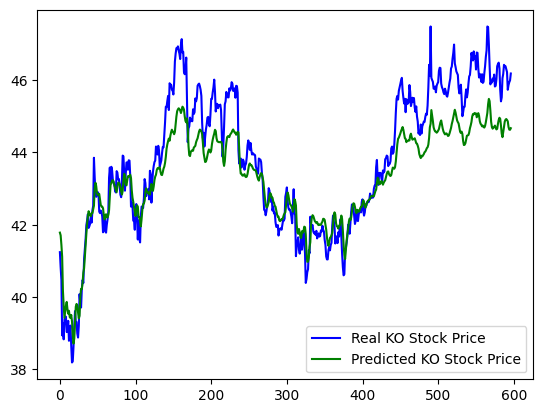

In [ ]:
plt.plot(scaler.inverse_transform(y_test[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

**Option2**: Propagate the first layer and provide every output of the first layer to the following layer:

In [ ]:
look_back = 2;
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 25.66 RMSE
Test Score: 62.54 RMSE
Train Score: 9.54 MAPE
Test Score: 11.31 MAPE
1


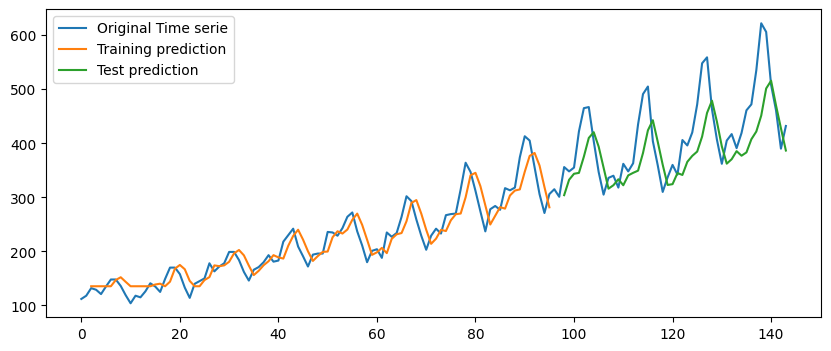

In [ ]:
model5b = Sequential()
model5b.add(SimpleRNN(5,activation = 'relu',return_sequences=True,input_shape=(1,look_back)))
model5b.add(SimpleRNN(5,activation = 'relu'))
model5b.add(Dense(1))
#-----------------------------------------------------------------------------------------------
model5b.compile(optimizer='adam',loss='mse')
model5b.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model5b,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

In [ ]:
model5b.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)             │ (None, 1, 5)                │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_10 (SimpleRNN)            │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305 (1.20 KB)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204 (820.00 B)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 0.32 RMSE
Test Score: 0.48 RMSE
Train Score: 0.75 MAPE
Test Score: 0.87 MAPE
1


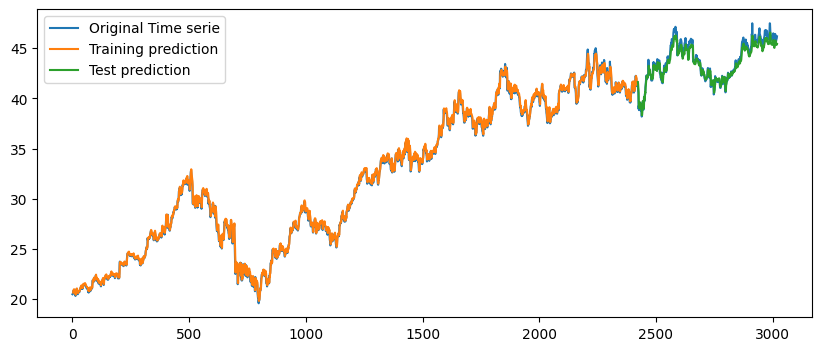

In [ ]:
look_back = 3;
dataset = dataset1.values
dataset = dataset.astype('float32')
# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_dataset(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_dataset(testN, look_back)
#-----------------------------------------------------------------------
model5b = Sequential()
model5b.add(SimpleRNN(20,activation = 'relu',return_sequences=True,input_shape=(1,look_back)))
model5b.add(SimpleRNN(20,activation = 'relu'))
model5b.add(Dense(1))
#-----------------------------------------------------------------------------------------
model5b.compile(optimizer='adam',loss='mse')
model5b.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=50, validation_split=0.10, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN(model5b,X_train,X_test,y_train,y_test,scaler,look_back,1)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

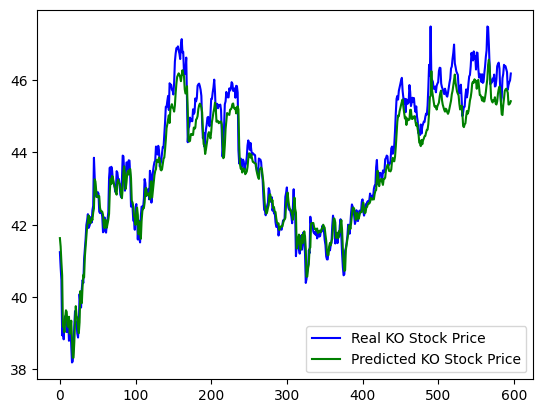

In [ ]:
plt.plot(scaler.inverse_transform(y_test[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

# Predicting several times ahead

### Walk forward using a Dense Network

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

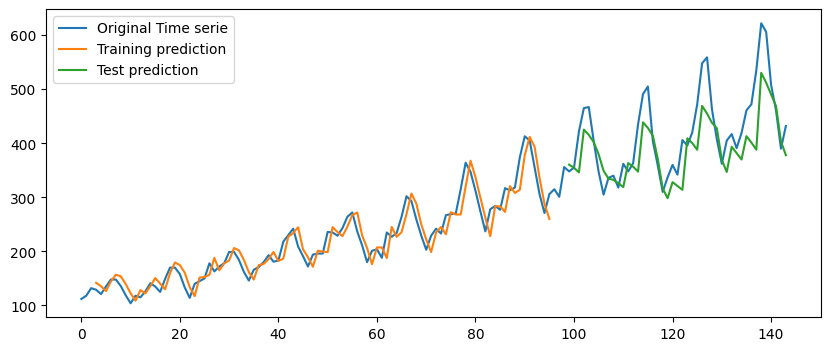

In [ ]:
look_back = 3;
time_ahead = 3
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_MultiStep(model3,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

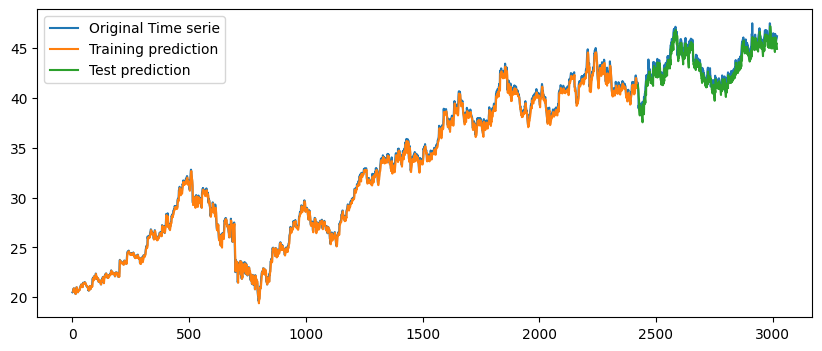

In [ ]:
look_back = 3;
time_ahead = 3
dataset = dataset1.values
dataset = dataset.astype('float32')
# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_MultiStep(model3b,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

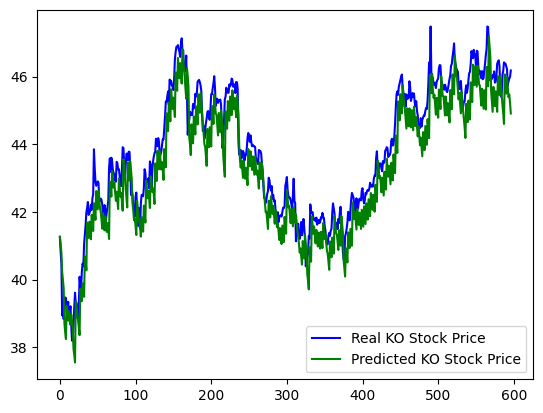

In [ ]:
plt.plot(scaler.inverse_transform(y_test.flatten()[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

### A dense network with multiple outputs

In [ ]:
look_back = 3
time_ahead = 3
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_train2, y_train2 = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = 1)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
print('Train',X_train[:10])
print('Test',y_train[:10])

Train [[0.02588999 0.04530746 0.09061491]
 [0.08090615 0.05501619 0.10032365]
 [0.14239484 0.14239484 0.10355988]
 [0.04854369 0.         0.04530746]
 [0.03559873 0.07119742 0.11974111]
 [0.10032365 0.06796119 0.14563107]
 [0.21359226 0.21359226 0.17475727]
 [0.09385115 0.03236246 0.11650488]
 [0.13268611 0.14886734 0.2394822 ]
 [0.1909385  0.22006473 0.2394822 ]]
Test [[0.08090615 0.05501619 0.10032365]
 [0.14239484 0.14239484 0.10355988]
 [0.04854369 0.         0.04530746]
 [0.03559873 0.07119742 0.11974111]
 [0.10032365 0.06796119 0.14563107]
 [0.21359226 0.21359226 0.17475727]
 [0.09385115 0.03236246 0.11650488]
 [0.13268611 0.14886734 0.2394822 ]
 [0.1909385  0.22006473 0.2394822 ]
 [0.3074434  0.3074434  0.25889972]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Train Score: 37.62 RMSE
Test Score: 86.11 RMSE
Train Score: 13.68 MAPE
Test Score: 16.66 MAPE
1


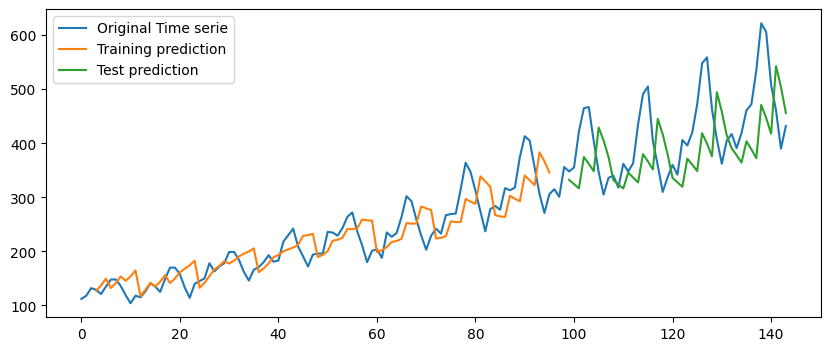

In [ ]:
model7 = Sequential()
model7.add(Dense(10,activation = 'relu',input_dim=look_back))
model7.add(Dense(5,activation = 'relu'))
model7.add(Dense(time_ahead))
model7.compile(optimizer='adam',loss='mse')
model7.fit(X_train2,y_train2,epochs=200, verbose=0)
#------------------------------------
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_MultiOuput(model7,X_train,X_test,y_train,y_test,scaler,look_back)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 0.43 RMSE
Test Score: 0.47 RMSE
Train Score: 0.99 MAPE
Test Score: 0.77 MAPE
3


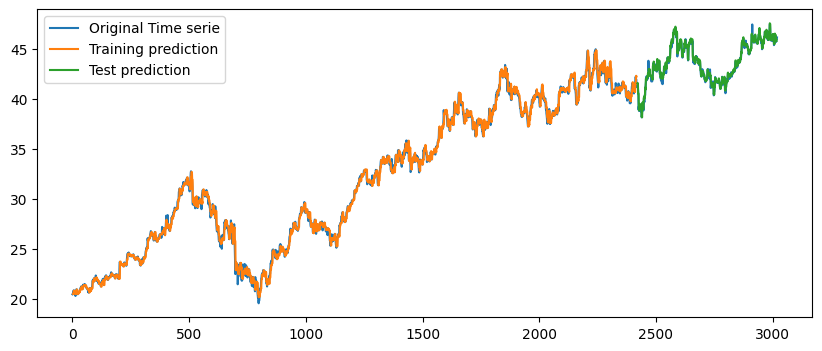

In [ ]:
look_back = 3
time_ahead = 3
dataset = dataset1.values
dataset = dataset.astype('float32')
# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_train2, y_train2 = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = 1)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
model7b = Sequential()
model7b.add(Dense(20,activation = 'relu',input_dim=look_back))
model7b.add(Dense(10,activation = 'relu'))
model7b.add(Dense(time_ahead))
model7b.compile(optimizer='adam',loss='mse')
model7b.fit(X_train2,y_train2,epochs=200, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_MultiOuput(model7b,X_train,X_test,y_train,y_test,scaler,look_back)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

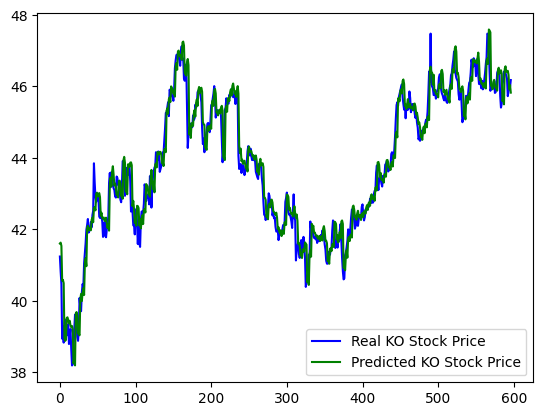

In [ ]:
plt.plot(scaler.inverse_transform(y_test.flatten()[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

### Walk forward using a RNN

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

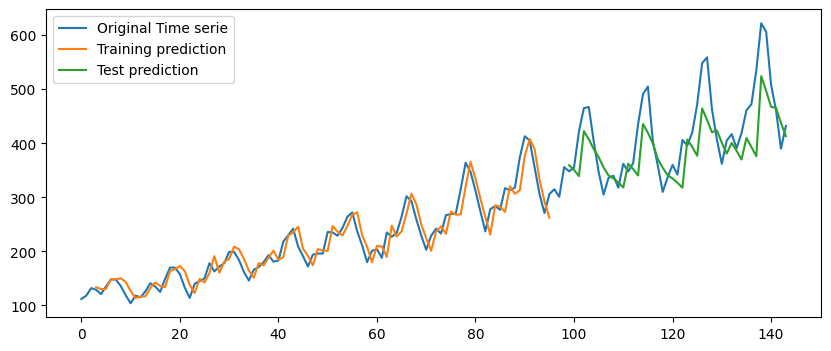

In [ ]:
look_back = 3;
time_ahead = 3
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
model6b = Sequential()
model6b.add(SimpleRNN(5,activation = 'relu',input_shape=(look_back,1)))
model6b.add(Dense(1))
model6b.compile(optimizer='adam',loss='mse')
model6b.fit(X_train.reshape(X_train.shape[0],look_back,1),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN_MultiStep(model6b,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead,0)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

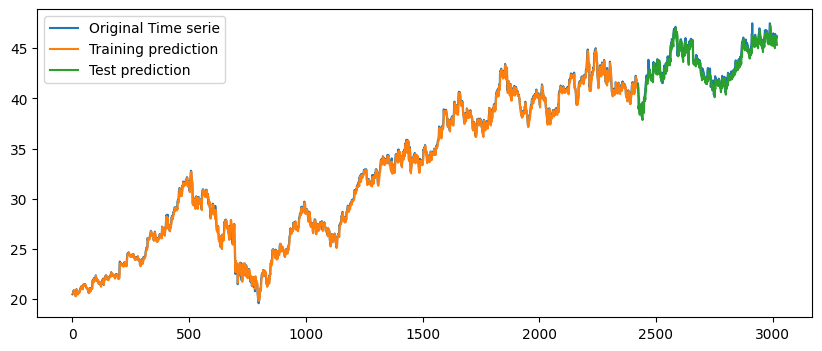

In [ ]:
look_back = 3;
time_ahead = 3
dataset = dataset1.values
dataset = dataset.astype('float32')
# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
model6c = Sequential()
model6c.add(SimpleRNN(20,activation = 'relu',input_shape=(look_back,1)))
model6c.add(Dense(1))
model6c.compile(optimizer='adam',loss='mse')
model6c.fit(X_train.reshape(X_train.shape[0],look_back,1),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN_MultiStep(model6c,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead,0)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

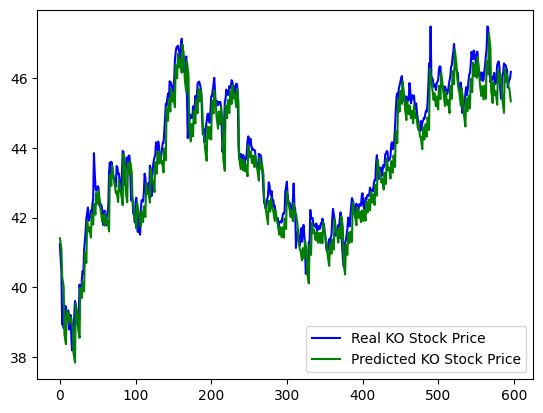

In [ ]:
plt.plot(scaler.inverse_transform(y_test.flatten()[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

## Encoder-Decoder architecture (sequence-to-sequence)

Input: **[n_samples,3,1]**

Ouput: **[n_samples,3,1]**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Train Score: 25.01 RMSE
Test Score: 81.94 RMSE
Train Score: 9.62 MAPE
Test Score: 14.34 MAPE
1


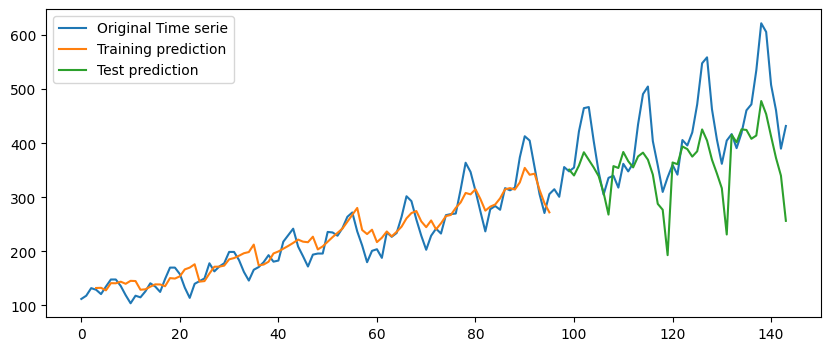

In [ ]:
look_back = 3;
time_ahead = 3
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_train2, y_train2 = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = 1)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
#-----------------------------------------------
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',input_shape=(look_back,1)))
model8.add(RepeatVector(time_ahead))
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True))
model8.add(TimeDistributed(Dense(1)))
#-----------------------------------------------------------------------
model8.compile(optimizer='adam',loss='mse')
model8.fit(X_train2.reshape(X_train2.shape[0],look_back,1),y_train2.reshape(y_train2.shape[0],time_ahead,1),epochs=1000, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN_MultiStepEncoDeco(model8,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 0.42 RMSE
Test Score: 0.53 RMSE
Train Score: 0.97 MAPE
Test Score: 0.89 MAPE
3


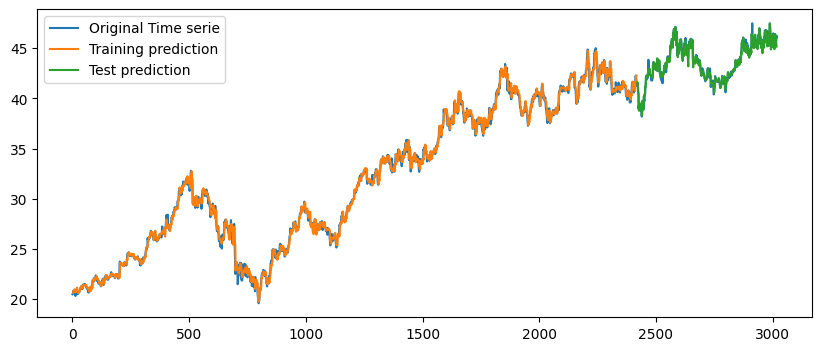

In [ ]:
look_back = 3;
time_ahead = 3
dataset = dataset1.values
dataset = dataset.astype('float32')
# split into train and test sets
test_size = 600
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_train2, y_train2 = DataPreparationRNN.create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = 1)
X_test, y_test = DataPreparationRNN.create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
model8b = Sequential()
model8b.add(SimpleRNN(20,activation = 'relu',input_shape=(look_back,1)))
model8b.add(RepeatVector(time_ahead))
model8b.add(SimpleRNN(20,activation = 'relu',return_sequences=True))
model8b.add(TimeDistributed(Dense(1)))
model8b.compile(optimizer='adam',loss='mse')
model8b.fit(X_train2.reshape(X_train2.shape[0],look_back,1),y_train2.reshape(y_train2.shape[0],time_ahead,1),epochs=1000, verbose=0)
trainPredict, testPredict = DataPreparationRNN.EstimaRMSE_RNN_MultiStepEncoDeco(model8b,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead)
DataPreparationRNN.PintaResultado(dataset,trainPredict,testPredict,look_back)

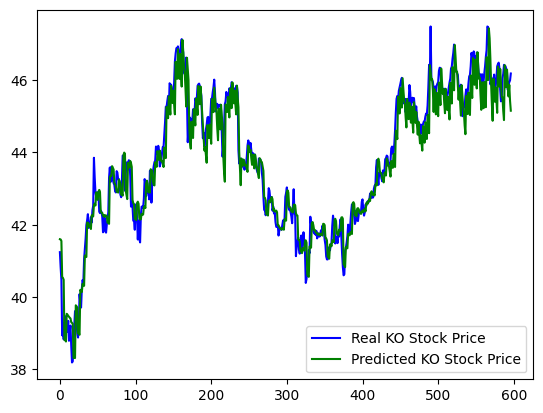

In [ ]:
plt.plot(scaler.inverse_transform(y_test.flatten()[:, np.newaxis]),'b',label='Real KO Stock Price')
plt.plot(testPredict.flatten(),'g',label='Predicted KO Stock Price')
plt.legend()
plt.show()

In [ ]:
repetitions = 2
#many-to-one
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True,input_shape=(look_back,1)))
model8.add(SimpleRNN(5,activation = 'relu'))
model8.add(Dense(1))

#many-to-many
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True,input_shape=(look_back,1)))
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True))
model8.add(TimeDistributed(Dense(1)))

#many-to-one
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',input_shape=(look_back,1)))
model8.add(RepeatVector(repetitions))
model8.add(SimpleRNN(5,activation = 'relu'))
model8.add(Dense(1))

#seq-to-seq
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',input_shape=(look_back,1)))
model8.add(RepeatVector(repetitions))
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True))
model8.add(TimeDistributed(Dense(1)))

In [ ]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils
!python Tutorial-Book-Utils/PL_data_loader.py --data COVIDTimeSeries
!unzip -q COVIDTimeSeries.zip

#many-to-one
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True,input_shape=(look_back,1)))
model8.add(SimpleRNN(5,activation = 'relu'))
model8.add(Dense(1))

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 45 (delta 18), reused 17 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 11.62 KiB | 5.81 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Downloading...
From: https://drive.google.com/uc?id=1B36Djko-f0LtVxSaBEVYosLTTsu0qtsh
To: /content/COVIDTimeSeries.zip
100% 3.18M/3.18M [00:00<00:00, 213MB/s]
COVIDTimeSeries.zip download complete!


# Covid DATASET Example

After loading the COVID-19 dataset through the `pandas` library, we will perform data pre-processing, using the same method we used in chapter 3. The time period for the data will be from January 22, 2020 to December 18, 2020.

In [ ]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
confirmed

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  \
0          0        0        0        0        0  ...   209322  209340   
1          0        0        0        0        0  ...   334391  334408   
2          0        0        0        0        0  ...   271441  271448   
3          0        0        0        0        0  ...    47866   47875   
4          0        0        0        0        0  ...   105255  105277   
..       ...      ...      ...      ...      ...  ...      ...     ...   
284        0        0        0        0        0  ...   703228  703228   
285        0        0        0        0        0  ...      535     535   
286        0        0        0        0        0  ...    11945   11945   
287        0        0        0        0        0  ...   343012  343012   
288        0        0        0        0        0  ...   263921  264127   

     3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    209358  209362  209369  209390  209406  209436  209451  209451  
1    334408  334427  334427  334427  334427  334427  334443  334457  
2    271463  271469  271469  271477  271477  271490  271494  271496  
3     47875   47875   47875   47875   47875   47875   47890   47890  
4    105277  105277  105277  105277  105277  105277  105288  105288  
..      ...     ...     ...     ...     ...     ...     ...     ...  
284  703228  703228  703228  703228  703228  703228  703228  703228  
285     535     535     535     535     535     535     535     535  
286   11945   11945   11945   11945   11945   11945   11945   11945  
287  343079  343079  343079  343135  343135  343135  343135  343135  
288  264127  264127  264127  264127  264127  264127  264276  264276  

[289 rows x 1147 columns]

In [ ]:
# Load the cumulative COVID-19 cases for South Korea.
!wget 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
confirmed[confirmed['Country/Region']=='China']
korea = confirmed[confirmed['Country/Region']=='China'].iloc[:,4:].T
korea.index = pd.to_datetime(korea.index)
daily_cases = korea.diff().fillna(korea.iloc[0]).astype('int')


def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Data transformation for supervised learning data.
seq_length = 5
X, y = create_sequences(daily_cases, seq_length)

# Dividing the dataset into traning, validation, and test sets.
train_size = int(327 * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+33], y[train_size:train_size+33]
X_test, y_test = X[train_size+33:], y[train_size+33:]

MIN = X_train.min()
MAX = X_train.max()

def MinMaxScale(array, min, max):

    return (array - min) / (max - min)

# MinMax scaling
X_train = MinMaxScale(X_train, MIN, MAX)
y_train = MinMaxScale(y_train, MIN, MAX)
X_val = MinMaxScale(X_val, MIN, MAX)
y_val = MinMaxScale(y_val, MIN, MAX)
X_test = MinMaxScale(X_test, MIN, MAX)
y_test = MinMaxScale(y_test, MIN, MAX)

# Tensor transformation
def make_Tensor(array):
    return torch.from_numpy(array).float()

X_train = make_Tensor(X_train)
y_train = make_Tensor(y_train)
X_val = make_Tensor(X_val)
y_val = make_Tensor(y_val)
X_test = make_Tensor(X_test)
y_test = make_Tensor(y_test)

--2024-10-26 16:11:14--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1819904 (1.7M) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>]   1.74M  --.-KB/s    in 0.04s   

2024-10-26 16:11:14 (43.8 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [1819904/1819904]



In [ ]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [ ]:
dailyCOVID = daily_cases.values

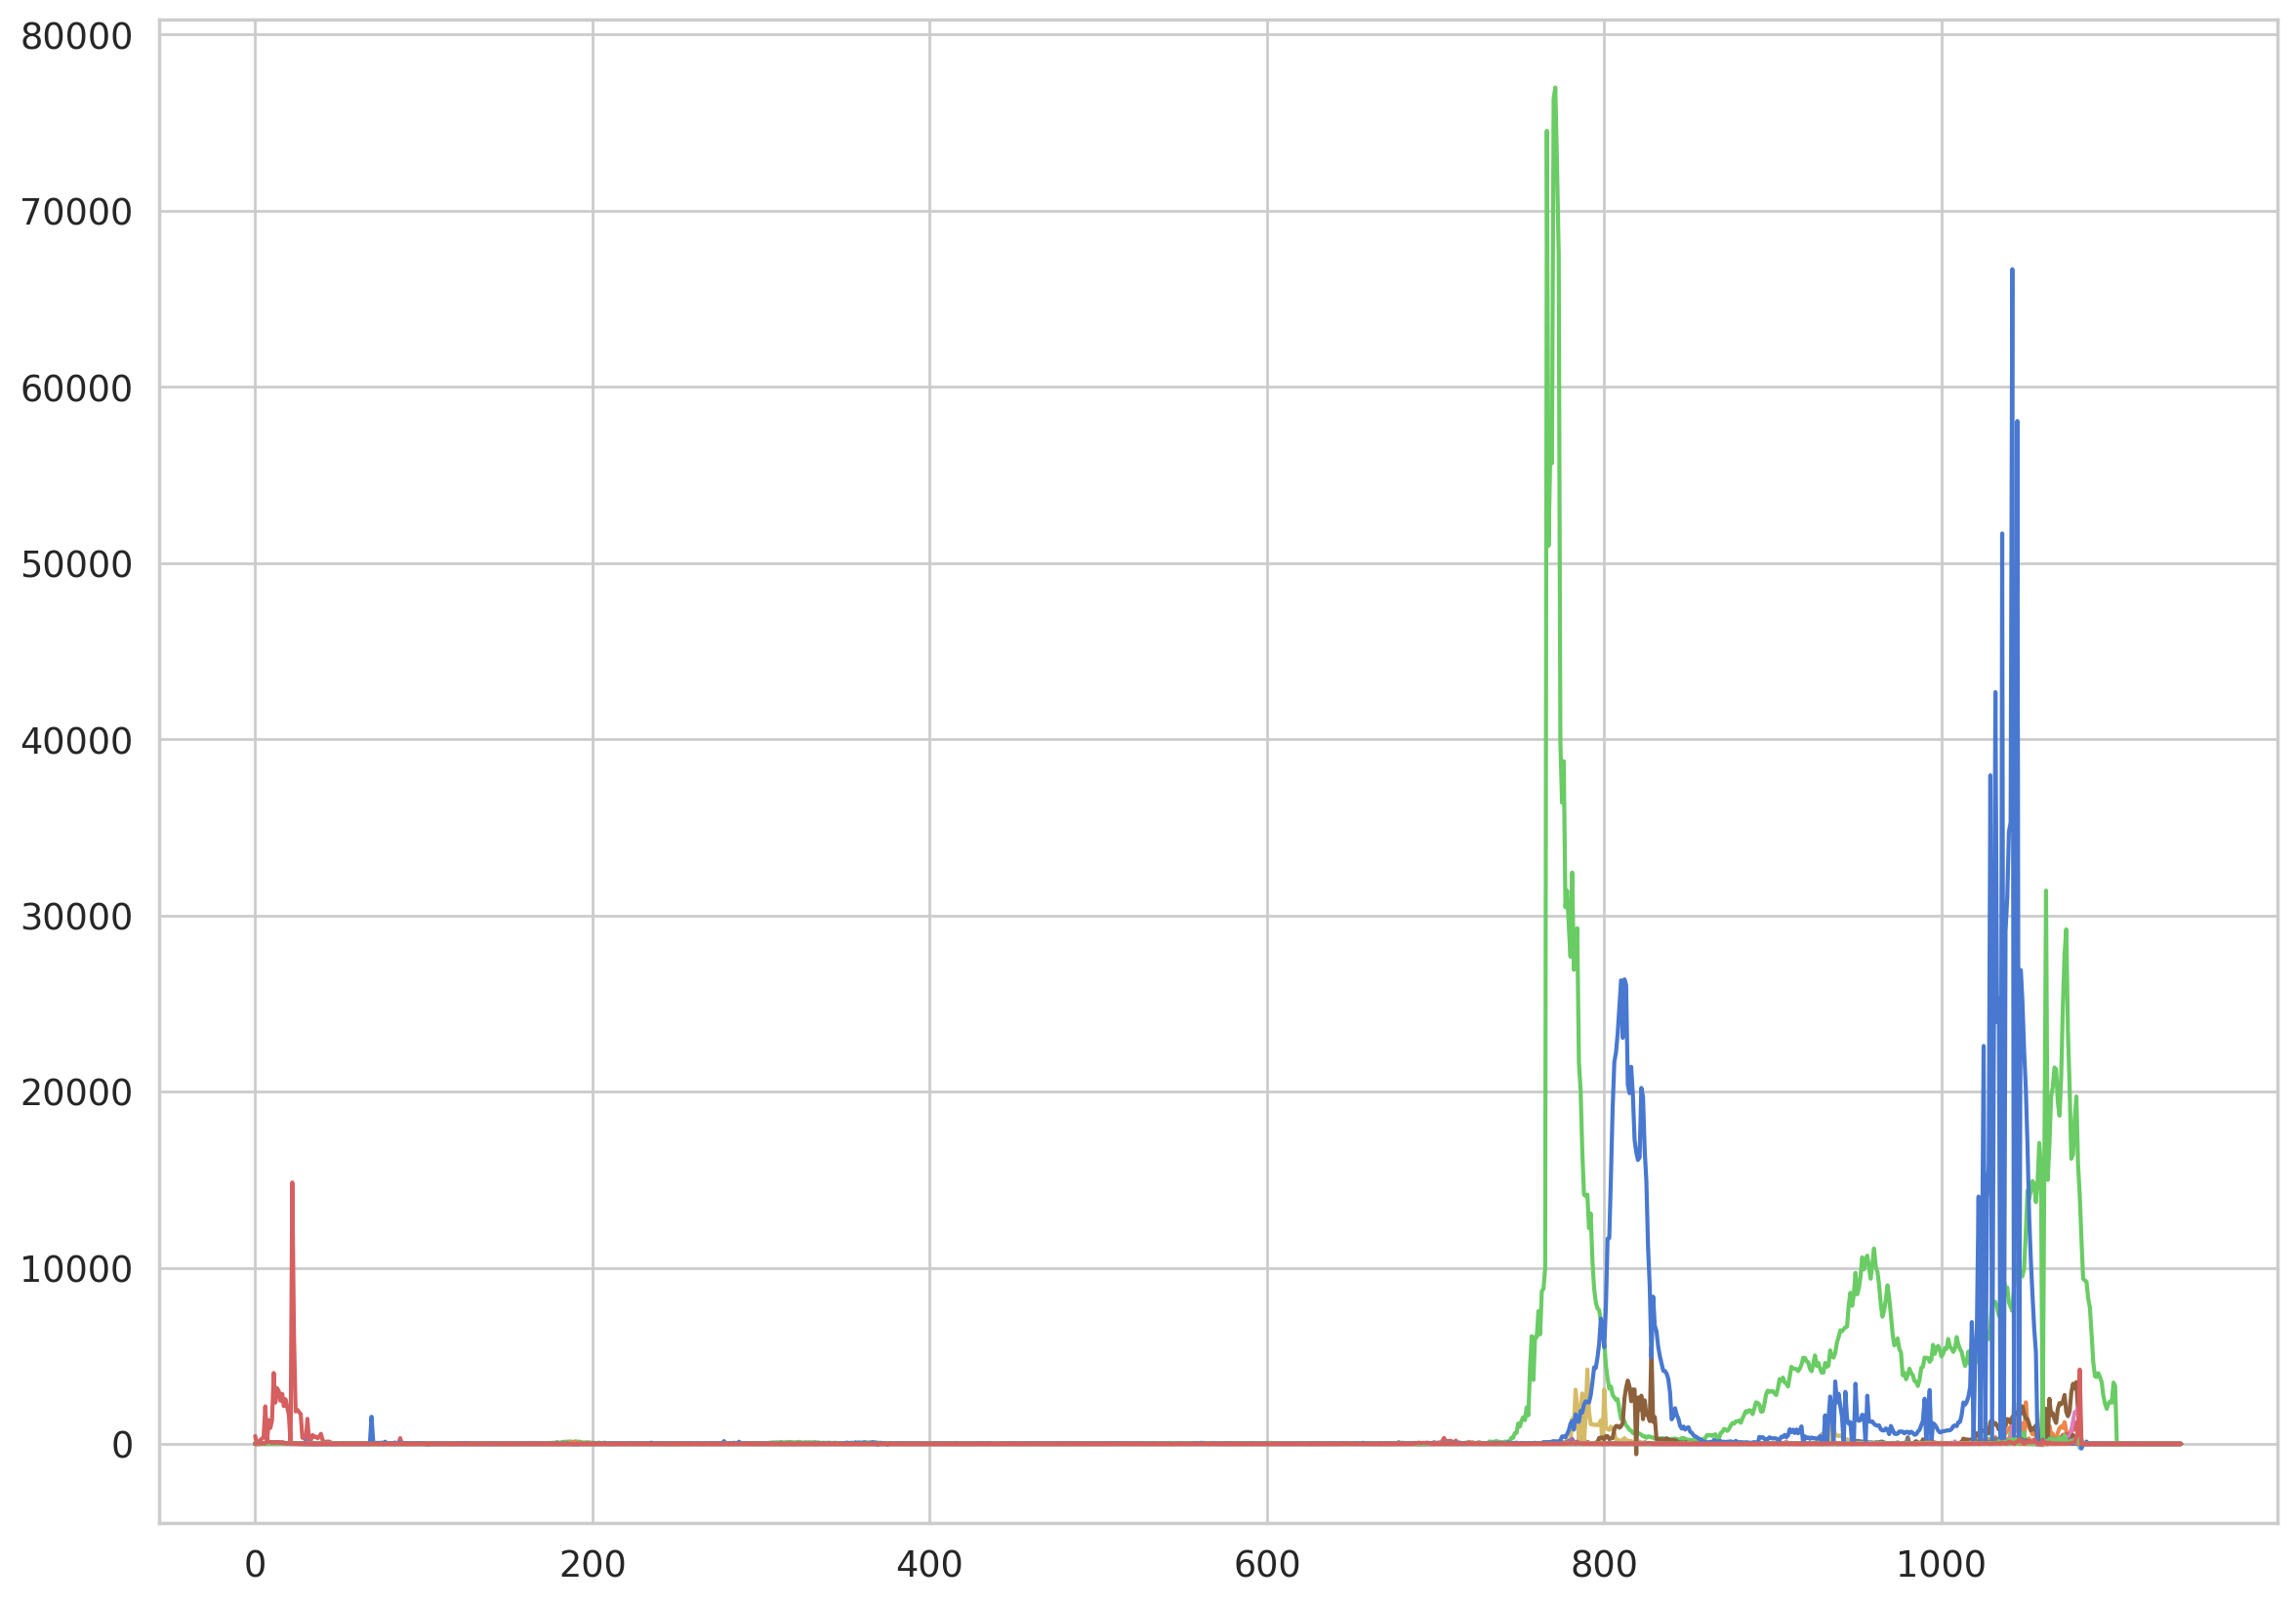

In [ ]:
plt.plot(daily_cases.values)
plt.show()

Tarea 1: RNN

- Replicar los experimentos en los diferentes contexto secuenciales para algún país en el dataset de covid,

- revisar las arquitecturas y parámetros para hacer predicciones times_ahead

In [ ]:
import pandas as pd

In [ ]:
korea.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18'],
              dtype='datetime64[ns]', length=332, freq=None)

In [ ]:
# Get the Korea COVID data from the entire dataset

dbKorea = pd.DataFrame({'Time':korea.index,'Casos': korea.iloc[:,-1].values})

In [ ]:
dbKorea

Time  Casos
0   2020-01-22     10
1   2020-01-23     27
2   2020-01-24     43
3   2020-01-25     62
4   2020-01-26    104
..         ...    ...
327 2020-12-14   1297
328 2020-12-15   1297
329 2020-12-16   1297
330 2020-12-17   1297
331 2020-12-18   1298

[332 rows x 2 columns]

In [ ]:
DataPreparationRNN.PlotValidationTimeSeries(dbKorea.sample(50))

In [ ]:
!gdown '172CnjznTyA7d7bLI0SdLirQmLf7SGHk4'

Downloading...
From: https://drive.google.com/uc?id=172CnjznTyA7d7bLI0SdLirQmLf7SGHk4
To: /content/owid-covid-data.csv
100% 101M/101M [00:01<00:00, 98.3MB/s]


In [ ]:
!gdown '172CnjznTyA7d7bLI0SdLirQmLf7SGHk4'

dataCovid = pd.read_csv('owid-covid-data.csv',sep =',',on_bad_lines='skip')
dataCovid

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
394089      ZWE    Africa     Zimbabwe  2024-04-10     266359.0        0.0   
394090      ZWE    Africa     Zimbabwe  2024-04-11     266359.0        0.0   
394091      ZWE    Africa     Zimbabwe  2024-04-12     266359.0        0.0   
394092      ZWE    Africa     Zimbabwe  2024-04-13     266359.0        0.0   
394093      ZWE    Africa     Zimbabwe  2024-04-14     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
394089                 0.0        5740.0         0.0                  0.0   
394090                 0.0        5740.0         0.0                  0.0   
394091                 0.0        5740.0         0.0                  0.0   
394092                 0.0        5740.0         0.0                  0.0   
394093                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
394089  ...          30.7                  36.791                         1.7   
394090  ...          30.7                  36.791                         1.7   
394091  ...          30.7                  36.791                         1.7   
394092  ...          30.7                  36.791                         1.7   
394093  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
394089            61.49                    0.571  16320539.0   
394090            61.49                    0.571  16320539.0   
394091            61.49                    0.571  16320539.0   
394092            61.49                    0.571  16320539.0   
394093            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

**LIBRO Interesante**

https://www.bishopbook.com/

In [ ]:
idxCOL = dataCovid['location'].str.contains('Colombia')

dataCovidCOL = dataCovid[idxCOL]

In [10]:
dataCOL_values = dataCovidCOL['new_cases_smoothed'].dropna().values
dataCOL_values = np.reshape(dataCOL_values,(len(dataCOL_values),1))

array([[ 0.   ],
       [ 0.   ],
       [ 0.   ],
       ...,
       [22.857],
       [22.857],
       [19.857]])

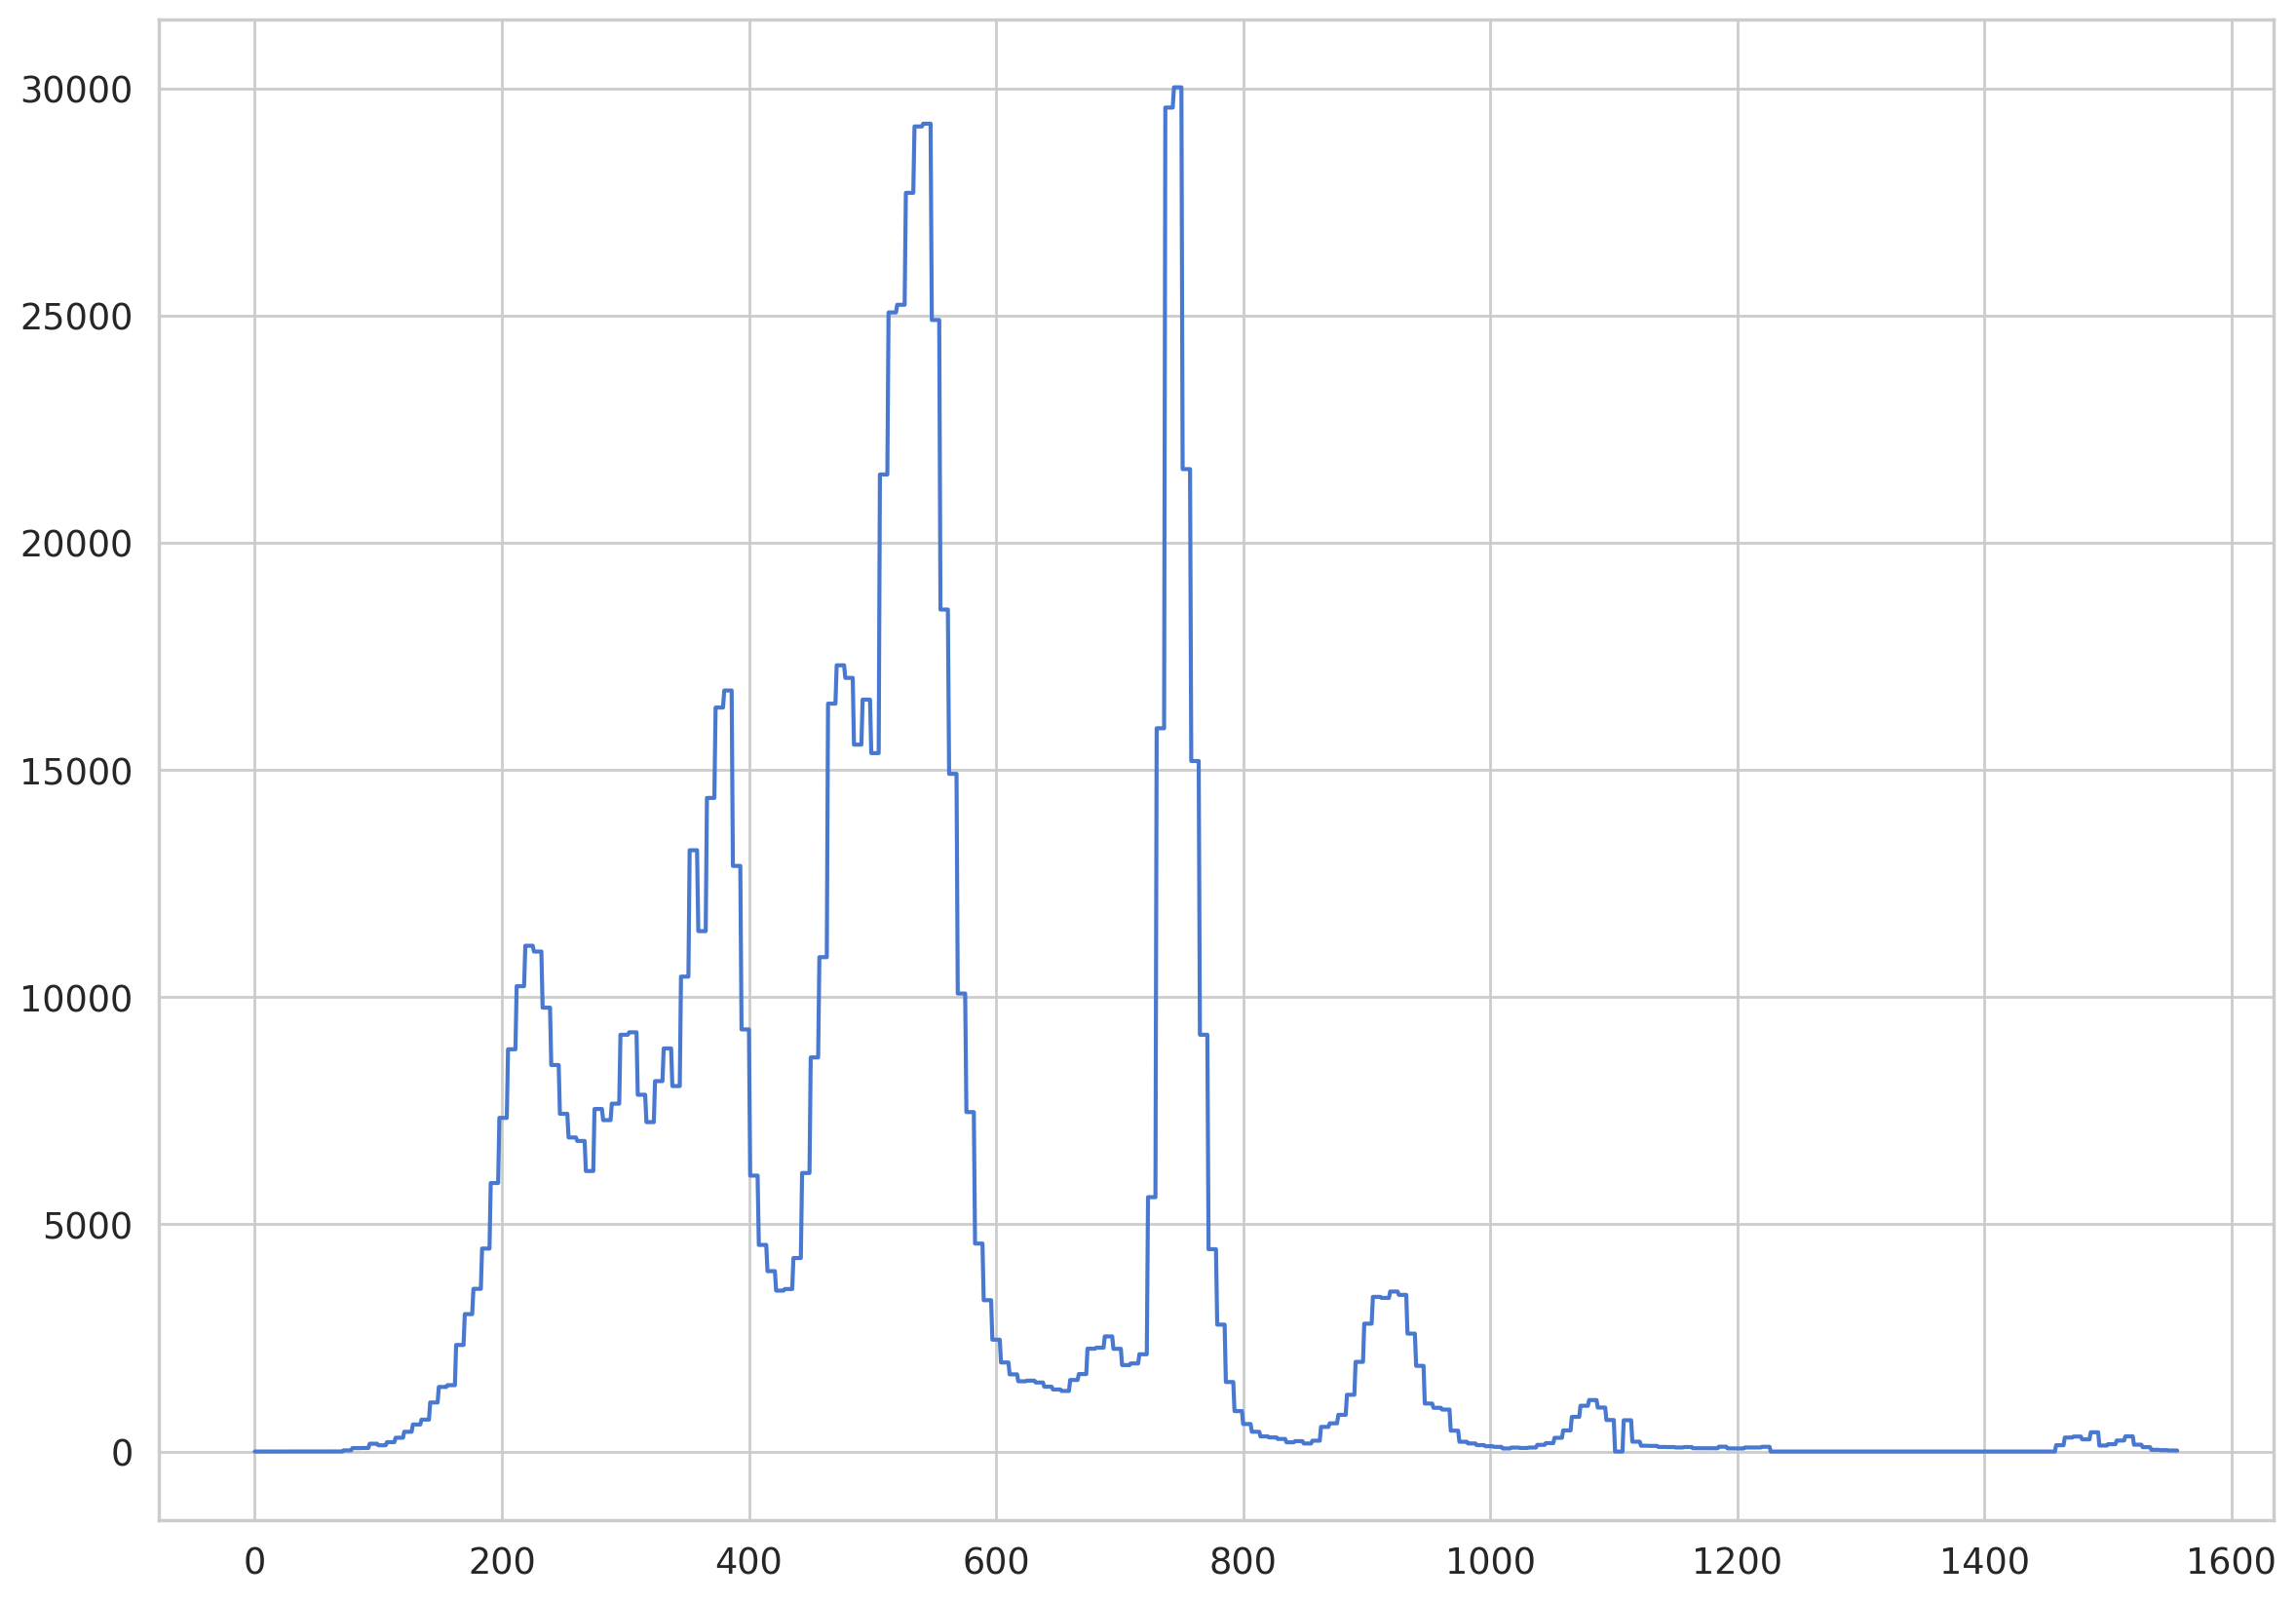

In [ ]:
plt.plot(dataCOL_values)
plt.show()

# 🎓 **Classwork: Temporal Modeling of COVID-19 Cases with a Simple RNN** 🎓

## 🔍 **Objective:**
The goal of this classwork is to use a **Simple Recurrent Neural Network (RNN)** to model the temporal evolution of **COVID-19 cases**. You will analyze how well a basic RNN can capture trends in daily new cases for **three different countries** from the COVID-19 dataset. This exercise will provide insights into sequential data modeling with neural networks.

---

## 📝 **Instructions:**

### 1. Dataset
- Download the COVID-19 dataset from the following link:  
  [COVID-19 Data Repository](https://github.com/owid/covid-19-data/tree/master/public/data)  
  Use the **`owid-covid-data.csv`** file, which contains country-wise COVID-19 metrics.
- Select **three countries** for your analysis.

### 2. Preprocessing the Data
- Extract the **daily new COVID-19 cases** for each selected country.
- Handle any **missing values** through interpolation or by removing those entries.
- **Normalize** the time series to improve convergence.
- Use a **sliding window** to create sequences (e.g., predict the next day’s cases based on the last 14 days).

### 3. Building the Simple RNN Model
- Implement a **Simple RNN** in **TensorFlow** or **PyTorch** with:
  - **One or two RNN layers.**
  - **ReLU** activation for the hidden layers.
  - A **Dense layer** with one neuron as the output (predicting the next day’s cases).

### 4. Model Compilation and Training
- **Loss Function**: Use **Mean Squared Error (MSE)** to measure prediction error.
- **Optimizer**: Use **Adam** with a learning rate of 0.001.
- Train the model for **50 epochs** and use **early stopping** to prevent overfitting.
- Use a **train-test split** based on time to ensure future data is not used in training.

### 5. Evaluation and Visualization
- **Metrics**: Evaluate your model using the following:
  1. **MSE (Mean Squared Error)**  
  2. **MAE (Mean Absolute Error)**  
  3. **MAPE (Mean Absolute Percentage Error)**  

#### **Hint for Implementing MAPE**:  
MAPE measures the average percentage error between the actual and predicted values. Here’s the formula:

$$
\text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

**Important:** Ensure you handle **division by zero** if any actual value (`y_i`) is 0. You can skip those values or add a small constant (like `1e-10`) to avoid errors.


In [2]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

replicating local resources


In [3]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, RepeatVector, TimeDistributed, LSTM
from tensorflow import keras

from local.lib import DataPreparationRNN

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)


### **Cargar base de datos inicial de los casos de COVID-19.**

In [4]:
!gdown '172CnjznTyA7d7bLI0SdLirQmLf7SGHk4'

dataCovid = pd.read_csv('owid-covid-data.csv',sep =',',on_bad_lines='skip')
dataCovid

Downloading...
From: https://drive.google.com/uc?id=172CnjznTyA7d7bLI0SdLirQmLf7SGHk4
To: /content/owid-covid-data.csv
100% 101M/101M [00:00<00:00, 253MB/s] 


iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
394089      ZWE    Africa     Zimbabwe  2024-04-10     266359.0        0.0   
394090      ZWE    Africa     Zimbabwe  2024-04-11     266359.0        0.0   
394091      ZWE    Africa     Zimbabwe  2024-04-12     266359.0        0.0   
394092      ZWE    Africa     Zimbabwe  2024-04-13     266359.0        0.0   
394093      ZWE    Africa     Zimbabwe  2024-04-14     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
394089                 0.0        5740.0         0.0                  0.0   
394090                 0.0        5740.0         0.0                  0.0   
394091                 0.0        5740.0         0.0                  0.0   
394092                 0.0        5740.0         0.0                  0.0   
394093                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
394089  ...          30.7                  36.791                         1.7   
394090  ...          30.7                  36.791                         1.7   
394091  ...          30.7                  36.791                         1.7   
394092  ...          30.7                  36.791                         1.7   
394093  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
394089            61.49                    0.571  16320539.0   
394090            61.49                    0.571  16320539.0   
394091            61.49                    0.571  16320539.0   
394092            61.49                    0.571  16320539.0   
394093            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

In [13]:
# Extracción de datos para tres paises, se van a elegir paises
idxCOL = dataCovid['location'].str.contains('Colombia')

dataCovidCOL = dataCovid[idxCOL]
# Reemplazar los datos faltantes en los nuevos casos
dataCOL_values = dataCovidCOL['new_cases'].dropna().values
dataCOL_values = np.reshape(dataCOL_values,(len(dataCOL_values),1))

print(dataCOL_values)


[[  0.]
 [  0.]
 [  0.]
 ...
 [  0.]
 [  0.]
 [139.]]


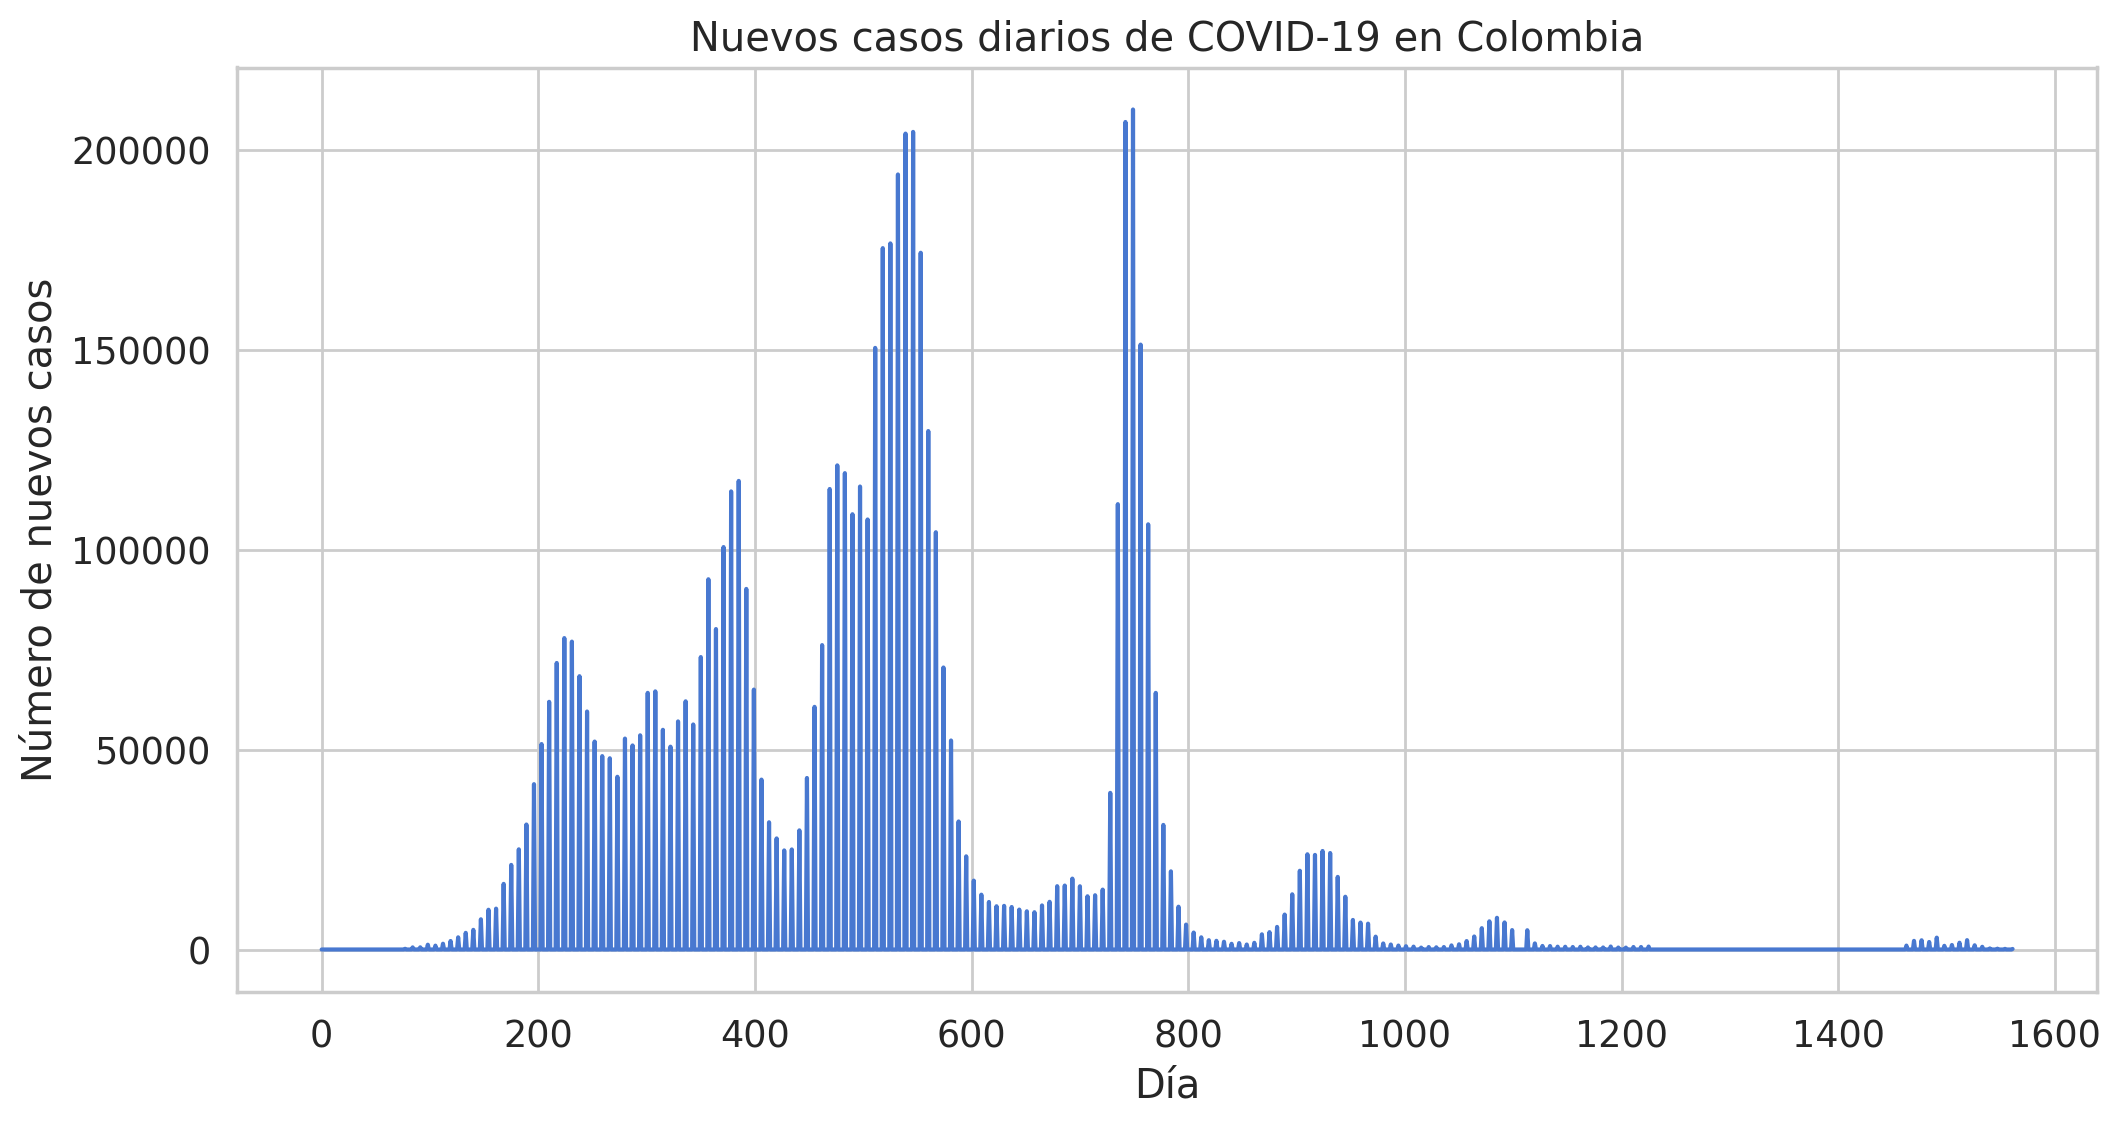

In [15]:
# prompt: crear grafico  de linea de los datos de covid en colombia

plt.figure(figsize=(12, 6))
plt.plot(dataCOL_values)
plt.title('Nuevos casos diarios de COVID-19 en Colombia')
plt.xlabel('Día')
plt.ylabel('Número de nuevos casos')
plt.grid(True)
plt.show()

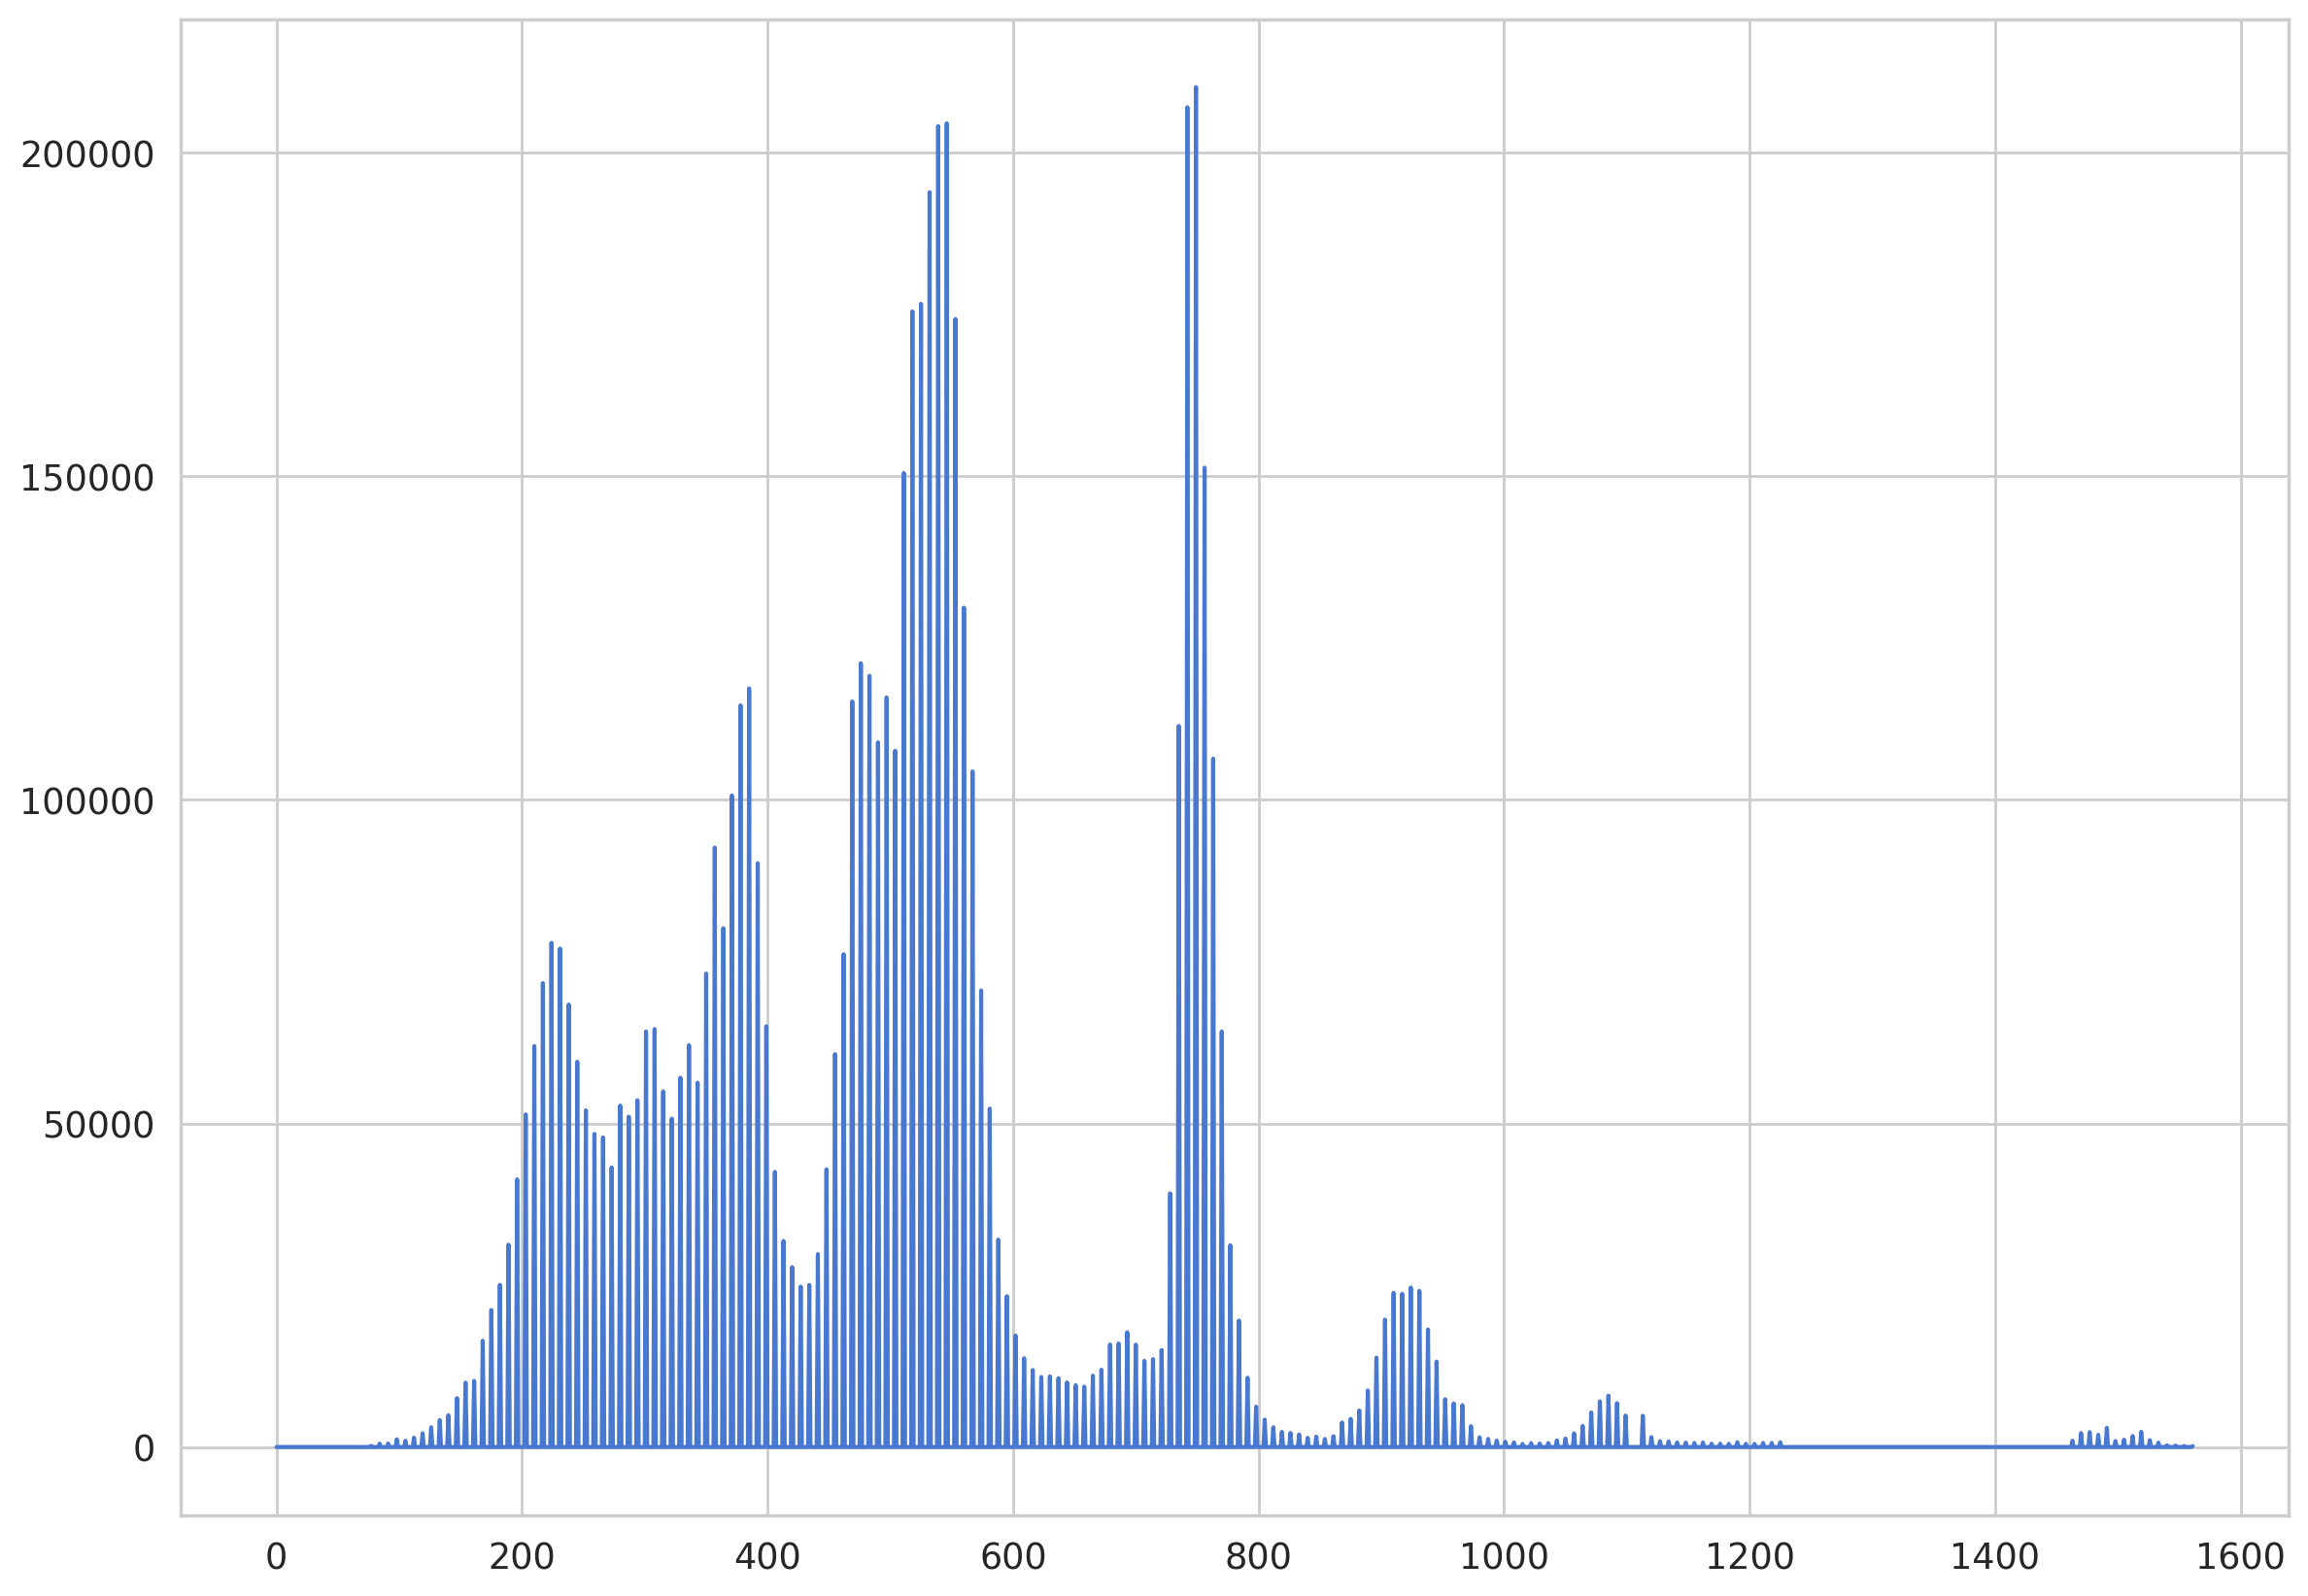

In [12]:
# prompt: En los datos de covid para colombia que estan esta celda quisiera que para la columna new_cases de acuerdo a la serie temporal se reemplazaran los valores Nan y ceros por su interpolación con los valores mas ceranos en fechas,

dataCovidCOL['new_cases'] = dataCovidCOL['new_cases'].interpolate(method='linear')
dataCovidCOL['new_cases'] = dataCovidCOL['new_cases'].fillna(method='bfill').fillna(method='ffill')
dataCOL_values = dataCovidCOL['new_cases'].values
dataCOL_values = np.reshape(dataCOL_values,(len(dataCOL_values),1))

plt.plot(dataCOL_values)
plt.show()

In [ ]:
DataPreparationRNN.PlotCrossvalidationTS()

In [ ]:
#many-to-one
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True,input_shape=(look_back,1)))
model8.add(SimpleRNN(5,activation = 'relu'))
model8.add(Dense(1))